<a href="https://colab.research.google.com/github/meizhutao/ISSS608/blob/master/ISSS623-G1-Applied%20Healthcare%20Analytics_Group%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: ISSS613 Group 1

Script: Preprocessing of CARES data

### 1. Initialisation - Read in dataset

In [2]:
!pip install ydata-profiling
!pip install --upgrade Pillow
!pip install lifelines

  Using cached lifelines-0.29.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached autograd_gamma-0.5.0-py3-none-any.whl
  Using cached formulaic-1.0.2-py3-none-any.whl.metadata (6.8 kB)
  Using cached interface_meta-1.3.0-py3-none-any.whl.metadata (6.7 kB)
Using cached lifelines-0.29.0-py3-none-any.whl (349 kB)
Using cached formulaic-1.0.2-py3-none-any.whl (94 kB)
Using cached interface_meta-1.3.0-py3-none-any.whl (14 kB)


In [3]:
import openpyxl
import pandas as pd
import os
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport
pd.set_option('display.max_columns', 200)


# 1. Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
import datetime as dt

# Machine Learning libraries
from sklearn.model_selection import (
    train_test_split, GridSearchCV, cross_val_predict, StratifiedKFold, KFold, RandomizedSearchCV
)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import (
    LinearRegression, Lasso, Ridge, LogisticRegression, ElasticNet
)
from sklearn.metrics import (
    accuracy_score, mean_squared_error, confusion_matrix, roc_auc_score, roc_curve, auc,
    precision_score, recall_score, f1_score, classification_report, mean_absolute_error, r2_score
)
from sklearn.ensemble import (
    VotingClassifier, StackingClassifier, GradientBoostingClassifier, IsolationForest,
    RandomForestClassifier, ExtraTreesClassifier
)
from sklearn.preprocessing import (
    PolynomialFeatures, OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_curve, auc, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score

# Import XGBoost
!pip install scikit-optimize
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from xgboost import XGBClassifier
# Import imbalanced-learn module
from imblearn.over_sampling import SMOTE

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# PyTorch libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
import torchvision

# TensorFlow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Ensure reproducibility
import random
random.seed(2024)
np.random.seed(2024)
torch.manual_seed(2024)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(2024)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 9.9 MB/s eta 0:00:00
Mounted at /content/drive


In [4]:
main_path = '/content/drive/MyDrive/ISSS623_Project'

data_file = os.path.join(main_path,'CARES_data.xlsx')
df = pd.read_excel(data_file)

### 2. Data exploration

In [ ]:

df.head()

,Indexno,AGE,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,AnaestypeCategory,PriorityCategory,TransfusionIntraandpostopCategory,AGEcategory,AGEcategoryOriginal,Mortality,thirtydaymortality,SurgRiskCategory,RaceCategory,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,Anemiacategorybinned,RDW15.7,ASAcategorybinned,ICUAdmgt24h
0,2,48,FEMALE,NaN,NaN,NaN,BLANK,NaN,NO,0,0,0,0,GA,Elective,0 units,30-49,30-49,No death,No,Low,Chinese,#NULL!,#NULL!,#NULL!,#NULL!,no,#NULL!,#NULL!,#NULL!,I,no
1,5,36,FEMALE,NaN,none,NaN,BLANK,NaN,NO,0,0,0,0,GA,Elective,0 units,30-49,30-49,No death,No,Low,Chinese,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,<= 15.7,I,no
2,6,64,FEMALE,NaN,mild,152.538570,g1,NaN,NO,0,0,0,0,GA,Elective,0 units,50-64,50-69,No death,No,Low,Chinese,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,G1,Mild,<= 15.7,I,no
3,9,73,MALE,NaN,moderate,117.231496,g1,NaN,NO,0,1,0,1,GA,Elective,1 unit,65-74,>=70,No death,No,Moderate,Chinese,#NULL!,#NULL!,#NULL!,#NULL!,no,G1,Moderate/Severe,<= 15.7,I,no
4,10,73,MALE,0.0,mild,98.651255,g1,59.0,NO,0,0,0,0,GA,Elective,0 units,65-74,>=70,Yes,No,Low,Chinese,no,no,no,no,no,G1,Mild,>15.7,II,no


In [ ]:
df.tail()

,Indexno,AGE,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,AnaestypeCategory,PriorityCategory,TransfusionIntraandpostopCategory,AGEcategory,AGEcategoryOriginal,Mortality,thirtydaymortality,SurgRiskCategory,RaceCategory,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,Anemiacategorybinned,RDW15.7,ASAcategorybinned,ICUAdmgt24h
90780,121192,66,FEMALE,2.0,mild,48.339582,G3a,NaN,NO,0,0,0,0,GA,Elective,0 units,65-74,50-69,No death,No,Moderate,Others,no,no,no,yes,no,G3,Mild,<= 15.7,II,no
90781,121194,50,MALE,1.0,moderate,126.592489,g1,NaN,NO,0,0,0,0,GA,Emergency,0 units,50-64,50-69,No death,No,Low,Others,no,no,no,yes,no,G1,Moderate/Severe,<= 15.7,#NULL!,no
90782,121197,58,FEMALE,NaN,none,86.306771,G2,NaN,NO,0,0,0,0,GA,Elective,0 units,50-64,50-69,No death,No,Low,Others,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,G2,NaN,<= 15.7,#NULL!,no
90783,121198,63,FEMALE,0.0,NaN,NaN,BLANK,NaN,NO,0,0,0,0,GA,Elective,0 units,50-64,50-69,No death,No,Moderate,Chinese,no,no,no,no,no,#NULL!,#NULL!,#NULL!,II,no
90784,121200,45,FEMALE,0.0,mild,125.902498,g1,NaN,NO,0,0,0,0,GA,Elective,0 units,30-49,30-49,No death,No,Moderate,Chinese,no,no,no,no,no,G1,Mild,<= 15.7,II,no


In [ ]:
# File contains a non-data row, remove irrelevant and fully empty rows
df = df[df['Indexno'] != '? Duplicates']

df.dropna(how='all', inplace=True)
df.reset_index(drop=True, inplace=True)
df.tail()

,Indexno,AGE,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,AnaestypeCategory,PriorityCategory,TransfusionIntraandpostopCategory,AGEcategory,AGEcategoryOriginal,Mortality,thirtydaymortality,SurgRiskCategory,RaceCategory,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,Anemiacategorybinned,RDW15.7,ASAcategorybinned,ICUAdmgt24h
90780,121192,66,FEMALE,2.0,mild,48.339582,G3a,NaN,NO,0,0,0,0,GA,Elective,0 units,65-74,50-69,No death,No,Moderate,Others,no,no,no,yes,no,G3,Mild,<= 15.7,II,no
90781,121194,50,MALE,1.0,moderate,126.592489,g1,NaN,NO,0,0,0,0,GA,Emergency,0 units,50-64,50-69,No death,No,Low,Others,no,no,no,yes,no,G1,Moderate/Severe,<= 15.7,#NULL!,no
90782,121197,58,FEMALE,NaN,none,86.306771,G2,NaN,NO,0,0,0,0,GA,Elective,0 units,50-64,50-69,No death,No,Low,Others,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,G2,NaN,<= 15.7,#NULL!,no
90783,121198,63,FEMALE,0.0,NaN,NaN,BLANK,NaN,NO,0,0,0,0,GA,Elective,0 units,50-64,50-69,No death,No,Moderate,Chinese,no,no,no,no,no,#NULL!,#NULL!,#NULL!,II,no
90784,121200,45,FEMALE,0.0,mild,125.902498,g1,NaN,NO,0,0,0,0,GA,Elective,0 units,30-49,30-49,No death,No,Moderate,Chinese,no,no,no,no,no,G1,Mild,<= 15.7,II,no


In [ ]:
df.head()

,Indexno,AGE,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,AnaestypeCategory,PriorityCategory,TransfusionIntraandpostopCategory,AGEcategory,AGEcategoryOriginal,Mortality,thirtydaymortality,SurgRiskCategory,RaceCategory,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,Anemiacategorybinned,RDW15.7,ASAcategorybinned,ICUAdmgt24h
0,2,48,FEMALE,NaN,NaN,NaN,BLANK,NaN,NO,0,0,0,0,GA,Elective,0 units,30-49,30-49,No death,No,Low,Chinese,#NULL!,#NULL!,#NULL!,#NULL!,no,#NULL!,#NULL!,#NULL!,I,no
1,5,36,FEMALE,NaN,none,NaN,BLANK,NaN,NO,0,0,0,0,GA,Elective,0 units,30-49,30-49,No death,No,Low,Chinese,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,<= 15.7,I,no
2,6,64,FEMALE,NaN,mild,152.538570,g1,NaN,NO,0,0,0,0,GA,Elective,0 units,50-64,50-69,No death,No,Low,Chinese,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,G1,Mild,<= 15.7,I,no
3,9,73,MALE,NaN,moderate,117.231496,g1,NaN,NO,0,1,0,1,GA,Elective,1 unit,65-74,>=70,No death,No,Moderate,Chinese,#NULL!,#NULL!,#NULL!,#NULL!,no,G1,Moderate/Severe,<= 15.7,I,no
4,10,73,MALE,0.0,mild,98.651255,g1,59.0,NO,0,0,0,0,GA,Elective,0 units,65-74,>=70,Yes,No,Low,Chinese,no,no,no,no,no,G1,Mild,>15.7,II,no


In [ ]:
# Reorder columns based on Demographics, Target, Base feature set
colnames=list(df)
print(colnames)

colnew = ['Indexno', 'AGE', 'AGEcategory', 'AGEcategoryOriginal', 'GENDER', 'RaceCategory',

          'DaysbetweenDeathandoperation', 'Mortality', 'thirtydaymortality', '@30daymortality','ICUAdmgt24h',

          'Anemia category', 'Anemiacategorybinned','GradeofKidneydisease', 'GradeofKidneyCategory',
          'PreopEGFRMDRD', 'Preoptransfusionwithin30days', 'Intraop', 'Postopwithin30days',
          'Transfusionintraandpostop', 'TransfusionIntraandpostopCategory', 'AnaestypeCategory',
          'PriorityCategory', 'RCRI score', 'SurgRiskCategory', 'CVARCRICategory', 'IHDRCRICategory',
          'CHFRCRICategory', 'DMinsulinRCRICategory', 'CreatinineRCRICategory',
          'RDW15.7', 'ASAcategorybinned']

df = df.loc[:,colnew]
colnames=list(df)
print(colnames)

['Indexno', 'AGE', 'GENDER', 'RCRI score', 'Anemia category', 'PreopEGFRMDRD', 'GradeofKidneydisease', 'DaysbetweenDeathandoperation', '@30daymortality', 'Preoptransfusionwithin30days', 'Intraop', 'Postopwithin30days', 'Transfusionintraandpostop', 'AnaestypeCategory', 'PriorityCategory', 'TransfusionIntraandpostopCategory', 'AGEcategory', 'AGEcategoryOriginal', 'Mortality', 'thirtydaymortality', 'SurgRiskCategory', 'RaceCategory', 'CVARCRICategory', 'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory', 'CreatinineRCRICategory', 'GradeofKidneyCategory', 'Anemiacategorybinned', 'RDW15.7', 'ASAcategorybinned', 'ICUAdmgt24h']
['Indexno', 'AGE', 'AGEcategory', 'AGEcategoryOriginal', 'GENDER', 'RaceCategory', 'DaysbetweenDeathandoperation', 'Mortality', 'thirtydaymortality', '@30daymortality', 'ICUAdmgt24h', 'Anemia category', 'Anemiacategorybinned', 'GradeofKidneydisease', 'GradeofKidneyCategory', 'PreopEGFRMDRD', 'Preoptransfusionwithin30days', 'Intraop', 'Postopwithin30days', 'Tr

Variables available:
1.	Indexno
2.	AGE
3.	AGEcategory
4.	AGEcategoryOriginal
5.	GENDER
6.	RaceCategory
7.	DaysbetweenDeathandoperation
8.	Mortality
9.	thirtydaymortality
10.	@30daymortality
11.	ICUAdmgt24h
12.	Anemia category
13.	Anemiacategorybinned
14.	GradeofKidneydisease
15.	GradeofKidneyCategory
16.	PreopEGFRMDRD
17.	Preoptransfusionwithin30days
18.	Intraop
19.	Postopwithin30days
20.	Transfusionintraandpostop
21.	TransfusionIntraandpostopCategory
22.	AnaestypeCategory
23.	PriorityCategory
24.	SurgRiskCategory
25.	RCRI score
26.	CVARCRICategory
27.	IHDRCRICategory
28.	CHFRCRICategory
29.	DMinsulinRCRICategory
30.	CreatinineRCRICategory
31.	RDW15.7
32.	ASAcategorybinned

** Potential duplicates [Col: 9 and 10]

In [ ]:
pre_profile = ProfileReport(df)
pre_profile.to_file(os.path.join(main_path,"Preclean_report.html"))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x7c6041b1e810, file "/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 167>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### 2.1 General filter for duplicates

Duplicate check [Rows and Columns]
*   Assuming that index no. (patient ID) identifies a unique individual, duplicate check was ran twice: 1. all variables and 2. with subset of variables without index no.
*   [1.] No duplicates identified
*   [2.] The present dataset does not include a wide range of demographic variables (Age[rounded], gender, Race) for us to assume that the values of each row should be unique. We did not proceed to filter duplicates here.

Individuals: N = 90785

In [ ]:
# Duplicate check considering indexno
duplicates = df[df.duplicated(subset=colnames, keep=False)]
print('Length of Original: {}, Duplicates identified (w/ indexno.) {}'.format(len(df),len(duplicates)))

# Duplicate check ignoring indexno
duplicates = df[df.duplicated(subset=colnames[1:], keep=False)]
print('Length of Original: {}, Duplicates identified {}'.format(len(df),len(duplicates)))

Length of Original: 90785, Duplicates identified (w/ indexno.) 0
Length of Original: 90785, Duplicates identified 18977


In [ ]:
# Identical columns (check and removed): '@30daymortality','thirtydaymortality'
tmp_df = df.loc[:,['@30daymortality','thirtydaymortality']].copy()
tmp_df['thirtydaymortality'] = tmp_df['thirtydaymortality'].str.upper()
print("Rows mismatch: {}".format((tmp_df['@30daymortality']!=tmp_df['thirtydaymortality']).sum()))

df.drop('@30daymortality', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
colnames=list(df)
print(colnames)

Rows mismatch: 0
['Indexno', 'AGE', 'AGEcategory', 'AGEcategoryOriginal', 'GENDER', 'RaceCategory', 'DaysbetweenDeathandoperation', 'Mortality', 'thirtydaymortality', 'ICUAdmgt24h', 'Anemia category', 'Anemiacategorybinned', 'GradeofKidneydisease', 'GradeofKidneyCategory', 'PreopEGFRMDRD', 'Preoptransfusionwithin30days', 'Intraop', 'Postopwithin30days', 'Transfusionintraandpostop', 'TransfusionIntraandpostopCategory', 'AnaestypeCategory', 'PriorityCategory', 'RCRI score', 'SurgRiskCategory', 'CVARCRICategory', 'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory', 'CreatinineRCRICategory', 'RDW15.7', 'ASAcategorybinned']


Checking of values: Binning and Outliers

*  For GFR values, histogram for profiler shows the presence of potential outliers
   1. Bin check - Match bin categorisation [GradeofKidneyCategory, GradeofKidneydisease]
   2. Outlier detection and replacement for continuous variable [PreopEGFRMDRD]

In [ ]:
# GFR:
# G1  Normal or high                    ≥90
# G2  Mildly decreased                  60-89
# G3a Mildly to moderately decreased    45-59
# G3b Moderately to severely decreased  30-44
# G4  Severely decreased                15-29
# G5  Kidney failure                    <15
bins = [0, 30, 60, 90, float('inf')]
labels = ['G4-G5', 'G3', 'G2', 'G1']

tmp_df = df.copy()
tmp_df['GFR'] = pd.cut(tmp_df['PreopEGFRMDRD'], bins=bins, labels=labels, right=False)
tmp_df['GFR'] = tmp_df['GFR'].cat.add_categories('#NULL!').fillna('#NULL!')
print("GFR Rows mismatch: {}".format((tmp_df['GradeofKidneyCategory']!=tmp_df['GFR']).sum()))

GFR Rows mismatch: 0


In [ ]:
# GFR:
# G1  Normal or high                    ≥90
# G2  Mildly decreased                  60-89
# G3a Mildly to moderately decreased    45-59
# G3b Moderately to severely decreased  30-44
# G4  Severely decreased                15-29
# G5  Kidney failure                    <15

# Renaming g1 as G1 for standardization
df.loc[:,'GradeofKidneydisease'].replace({'g1': "G1"}, inplace=True)

bins = [0, 15, 30, 45,60, 90, float('inf')]
labels = ['G5','G4','G3b', 'G3a', 'G2', 'g1']

tmp_df = df.copy()
tmp_df['GFR'] = pd.cut(tmp_df['PreopEGFRMDRD'], bins=bins, labels=labels, right=False)
tmp_df['GFR'] = tmp_df['GFR'].cat.add_categories('BLANK').fillna('BLANK')
print("GFR Rows mismatch: {}".format((tmp_df['GradeofKidneydisease']!=tmp_df['GFR']).sum()))

GFR Rows mismatch: 47948


In [ ]:
def detect_outliers(df_master, subset):
  valid_range = {}
  for column in subset:
    q1 = df_master[column].quantile(0.25)
    q3 = df_master[column].quantile(0.75)
    iqr = q3 - q1

    # Outlier range:
    outlier_low = (df_master.loc[df_master[column]>q1 - 1.5 * iqr,column].min())
    outlier_high = (df_master.loc[df_master[column]<q3 + 1.5 * iqr,column].max())

    # Replace with:
    valid_low = (df_master.loc[df_master[column]>outlier_low,column].min())
    valid_high = (df_master.loc[df_master[column]<outlier_high,column].max())

    valid_range[column] = {
        'outlier_low': outlier_low,
        'outlier_high': outlier_high,
        'valid_low': valid_low,
        'valid_high': valid_high  }
  return valid_range

outlier_subset = ["PreopEGFRMDRD"]
valid_range = detect_outliers(df, outlier_subset)
print(valid_range)

{'PreopEGFRMDRD': {'outlier_low': 26.261670980220178, 'outlier_high': 167.15691517321068, 'valid_low': 26.279898296198365, 'valid_high': 166.9702448001901}}


In [ ]:
# Outlier correct for PreopEGFRMDRD to only be for values > q3+1.5IQR
valid_range['PreopEGFRMDRD']['outlier_low'] = 0
valid_range['PreopEGFRMDRD']['valid_low'] = 0

# To note: PreopEGFRMDRD consists of multiple values > q3+1.5IQR, even values>400.
# For a typical healthy young adult, the expected eGFR value is around 120
# There may be a need to consult domain experts regarding the validity of these values
# Following Chan et al., 2018's, as the categorical values were retained, we followed the assumption that the values are valid.
# Outlier correction here just allows for restricted range for later standardization should continuous value be of interest
print("Count of PreopEGFRMDRD > outlier value of {:.2f}: {}".format(valid_range['PreopEGFRMDRD']['outlier_high'],(df['PreopEGFRMDRD']> valid_range['PreopEGFRMDRD']['outlier_high']).sum()))
print("Count of PreopEGFRMDRD > value of {:d}: {}".format(400,(df['PreopEGFRMDRD']> 400).sum()))

Count of PreopEGFRMDRD > outlier value of 167.16: 1725
Count of PreopEGFRMDRD > value of 400: 15


In [ ]:
def outlier_removal_imputation(column_type, valid_range):
  column_range = valid_range[column_type]
  def outlier_removal_imputation_single_value(x):
    if x < column_range['outlier_low']:
        # impute with nearest valid value
        return column_range['valid_low']
    elif x > column_range['outlier_high']:
        # impute with nearest valid value
        return column_range['valid_high']
    else:
        return x
  return outlier_removal_imputation_single_value

def remove_outliers(df_master, valid_range):
  df = df_master.copy()
  for column in df.columns:
    if column in valid_range:
        df[column] = df[column].apply(outlier_removal_imputation(column, valid_range))
  return df

df_cleaned = remove_outliers(df, valid_range)
print(valid_range)

{'PreopEGFRMDRD': {'outlier_low': 0, 'outlier_high': 167.15691517321068, 'valid_low': 0, 'valid_high': 166.9702448001901}}


#### 2.2 Removal of missing data & recoding

*   **RaceCategory** : Missing 6 out of 90,785 records (<0.1%), as the N is small, consider dropping the 6 rows
*   **Anemia category** : Missing 4038 out of 90785 records (4.4%), we could choose to either drop it or to keep it for initial EDA. Missing values may be valuable (i.e., was the test not done because of some reasons), EDA to explore before deciding whether to keep or drop the records.
*   **ASAcategorybinned** : Missing 4816 out of 90785 records (5.3%), we could choose to either drop it or to keep it for initial EDA. Missing values may be valuable (i.e., was the test not done because of some reasons), EDA to explore before deciding whether to keep or drop the records.
*   **RCRI** : Subcomponents of the RCRI score have a relatively high % of missing values. Thus, only 63361 records had an overall RCRI score.




In [ ]:
# Remove rows with missing Race
df_cleaned = df_cleaned[df_cleaned['RaceCategory'] != '#NULL!']
df_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
# Preoptransfusionwithin30days is predominantly 0 [~98% of cases]. Rather than have it as a continuous, conversion to bin
df_cleaned.loc[:,'Preoptransfusionwithin30days_YN'] = df_cleaned['Preoptransfusionwithin30days']>0

In [ ]:
# Anemiacategorybinned has None coded as missing and missing as #NULL!, check to see if that's true if so, add category "None"
df_cleaned.loc[:,'Anemiacategorybinned'].replace({np.nan: 'None'}, inplace=True)

df_cleaned.loc[:,'Anemiacategorybin'] = df_cleaned['Anemia category'].copy()
df_cleaned.loc[:,'Anemiacategorybin'].replace({np.nan: '#NULL!', 'none': "None", 'mild': "Mild",'moderate': 'Moderate/Severe','severe': 'Moderate/Severe'}, inplace=True)
print("Rows mismatch: {}".format((df_cleaned['Anemiacategorybinned']!=df_cleaned['Anemiacategorybin']).sum()))

# Drop column for checking
df_cleaned.drop('Anemiacategorybin', axis=1, inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)

Rows mismatch: 0


In [ ]:
# Remove rows with missing values - Code if we were to drop the rows
# df_cleaned = df_cleaned.dropna(subset=['Anemia category'])
# df_cleaned = df_cleaned[df_cleaned['ASAcategorybinned'] != '#NULL!']
# df_cleaned.reset_index(drop=True, inplace=True)

#### 2.3 Feature engineering

RCRI - Risk Binning based on Lee et al. 1999

In [ ]:
# RCRI Score:
# Lee et al., https://www.ahajournals.org/doi/full/10.1161/01.CIR.100.10.1043
# Class I   -	0 points: Very low risk (0.4% risk of major cardiac complications)
# Class II  - 1 point: Low risk (0.9% risk)
# Class III - 2 points: Moderate risk (6.6% risk)
# Class IV  - 3 or more points: High risk (11% or higher risk)
bins = [0, 1, 2, 3, float('inf')]
labels = ['I','II','III', 'IV']

df_cleaned['RCRI_Risk'] = pd.cut(df_cleaned['RCRI score'], bins=bins, labels=labels, right=False)
df_cleaned['RCRI_Risk'] = df_cleaned['RCRI_Risk'].cat.add_categories('#NULL!').fillna('#NULL!')

In [ ]:
# Reorder columns based on Demographics, Target, Base feature set
colnew = ['Indexno', 'AGE', 'AGEcategory', 'AGEcategoryOriginal', 'GENDER', 'RaceCategory',

          'DaysbetweenDeathandoperation', 'Mortality', 'thirtydaymortality', 'ICUAdmgt24h',

          'Anemia category', 'Anemiacategorybinned',
          'GradeofKidneydisease', 'GradeofKidneyCategory',
          'PreopEGFRMDRD', 'Preoptransfusionwithin30days', 'Intraop', 'Postopwithin30days',
          'Transfusionintraandpostop', 'TransfusionIntraandpostopCategory',
          'AnaestypeCategory', 'PriorityCategory',
          'RCRI score', 'RCRI_Risk','SurgRiskCategory', 'CVARCRICategory', 'IHDRCRICategory',
          'CHFRCRICategory', 'DMinsulinRCRICategory', 'CreatinineRCRICategory',
          'RDW15.7', 'ASAcategorybinned']

df_cleaned = df_cleaned.loc[:,colnew]
colnames=list(df)
print(colnames)

['Indexno', 'AGE', 'AGEcategory', 'AGEcategoryOriginal', 'GENDER', 'RaceCategory', 'DaysbetweenDeathandoperation', 'Mortality', 'thirtydaymortality', 'ICUAdmgt24h', 'Anemia category', 'Anemiacategorybinned', 'GradeofKidneydisease', 'GradeofKidneyCategory', 'PreopEGFRMDRD', 'Preoptransfusionwithin30days', 'Intraop', 'Postopwithin30days', 'Transfusionintraandpostop', 'TransfusionIntraandpostopCategory', 'AnaestypeCategory', 'PriorityCategory', 'RCRI score', 'SurgRiskCategory', 'CVARCRICategory', 'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory', 'CreatinineRCRICategory', 'RDW15.7', 'ASAcategorybinned']


In [ ]:
df_cleaned.describe(include='all')

,Indexno,AGE,AGEcategory,AGEcategoryOriginal,GENDER,RaceCategory,DaysbetweenDeathandoperation,Mortality,thirtydaymortality,ICUAdmgt24h,Anemia category,Anemiacategorybinned,GradeofKidneydisease,GradeofKidneyCategory,PreopEGFRMDRD,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,TransfusionIntraandpostopCategory,AnaestypeCategory,PriorityCategory,RCRI score,RCRI_Risk,SurgRiskCategory,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,RDW15.7,ASAcategorybinned
count,90779.000000,90779.000000,90779,90779,90779,90779,5595.000000,90779,90779,90779,86743,90779,90779,90779,79951.000000,90779.000000,90779.000000,90779.000000,90779.000000,90779,90779,90779,63359.000000,90779,90779,90779,90779,90779,90779,90779,90779,90779
unique,NaN,NaN,6,4,2,4,NaN,2,2,2,4,4,7,5,NaN,NaN,NaN,NaN,NaN,3,2,2,NaN,5,3,3,3,3,3,3,3,5
top,NaN,NaN,50-64,50-69,FEMALE,Chinese,NaN,No death,No,no,none,None,G1,G1,NaN,NaN,NaN,NaN,NaN,0 units,GA,Elective,NaN,I,Low,no,no,no,no,no,<= 15.7,II
freq,NaN,NaN,28226,37358,48705,64861,NaN,85184,90240,89515,62876,62876,47944,47944,NaN,NaN,NaN,NaN,NaN,85658,76437,72326,NaN,47384,48046,60915,57966,63737,61905,72758,76065,49433
mean,60333.894755,52.252889,NaN,NaN,NaN,NaN,476.782127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.712369,0.042675,0.056280,0.018947,0.075227,NaN,NaN,NaN,0.322290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,34929.952742,17.086772,NaN,NaN,NaN,NaN,421.866740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.453643,0.405853,0.230462,0.260737,0.395636,NaN,NaN,NaN,0.634792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,18.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.541026,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,29973.500000,39.000000,NaN,NaN,NaN,NaN,121.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.067704,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,60572.000000,54.000000,NaN,NaN,NaN,NaN,355.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.398561,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,90786.500000,65.000000,NaN,NaN,NaN,NaN,746.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.310169,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
int_profile = ProfileReport(df_cleaned)
int_profile.to_file(os.path.join(main_path,"Intclean_report.html"))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x7a20bce69840, file "/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 167>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


# 3. Data Visualization

In [4]:

df_cleaned.to_csv(os.path.join(main_path,'df_cleaned.csv'), index=False)

NameError: name 'df_cleaned' is not defined

In [5]:
df_cleaned  = pd.read_csv(os.path.join(main_path,'df_cleaned.csv'))

In [30]:
summary_stats = df_cleaned.describe(include='all')
summary_stats

,Indexno,AGE,AGEcategory,AGEcategoryOriginal,GENDER,RaceCategory,DaysbetweenDeathandoperation,Mortality,thirtydaymortality,ICUAdmgt24h,Anemia category,Anemiacategorybinned,GradeofKidneydisease,GradeofKidneyCategory,PreopEGFRMDRD,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,TransfusionIntraandpostopCategory,AnaestypeCategory,PriorityCategory,RCRI score,RCRI_Risk,SurgRiskCategory,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,RDW15.7,ASAcategorybinned
count,90779.000000,90779.000000,90779,90779,90779,90779,5595.000000,90779,90779,90779,86743,27903,90779,90779,79951.000000,90779.000000,90779.000000,90779.000000,90779.000000,90779,90779,90779,63359.000000,90779,90779,90779,90779,90779,90779,90779,90779,90779
unique,NaN,NaN,6,4,2,4,NaN,2,2,2,4,3,7,5,NaN,NaN,NaN,NaN,NaN,3,2,2,NaN,5,3,3,3,3,3,3,3,5
top,NaN,NaN,50-64,50-69,FEMALE,Chinese,NaN,No death,No,no,none,Mild,G1,G1,NaN,NaN,NaN,NaN,NaN,0 units,GA,Elective,NaN,I,Low,no,no,no,no,no,<= 15.7,II
freq,NaN,NaN,28226,37358,48705,64861,NaN,85184,90240,89515,62876,13004,47944,47944,NaN,NaN,NaN,NaN,NaN,85658,76437,72326,NaN,47384,48046,60915,57966,63737,61905,72758,76065,49433
mean,60333.894755,52.252889,NaN,NaN,NaN,NaN,476.782127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.712369,0.042675,0.056280,0.018947,0.075227,NaN,NaN,NaN,0.322290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,34929.952742,17.086772,NaN,NaN,NaN,NaN,421.866740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.453643,0.405853,0.230462,0.260737,0.395636,NaN,NaN,NaN,0.634792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,18.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.541026,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,29973.500000,39.000000,NaN,NaN,NaN,NaN,121.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.067704,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,60572.000000,54.000000,NaN,NaN,NaN,NaN,355.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.398561,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,90786.500000,65.000000,NaN,NaN,NaN,NaN,746.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.310169,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_cleaned_1 = df_cleaned.drop(['AGE','Indexno','AGEcategoryOriginal'], axis=1)
df_cleaned_1.head()

,AGEcategory,GENDER,RaceCategory,DaysbetweenDeathandoperation,Mortality,thirtydaymortality,ICUAdmgt24h,Anemia category,Anemiacategorybinned,GradeofKidneydisease,GradeofKidneyCategory,PreopEGFRMDRD,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,TransfusionIntraandpostopCategory,AnaestypeCategory,PriorityCategory,RCRI score,RCRI_Risk,SurgRiskCategory,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,RDW15.7,ASAcategorybinned
0,30-49,FEMALE,Chinese,NaN,No death,No,no,NaN,#NULL!,BLANK,#NULL!,NaN,0,0,0,0,0 units,GA,Elective,NaN,#NULL!,Low,#NULL!,#NULL!,#NULL!,#NULL!,no,#NULL!,I
1,30-49,FEMALE,Chinese,NaN,No death,No,no,none,NaN,BLANK,#NULL!,NaN,0,0,0,0,0 units,GA,Elective,NaN,#NULL!,Low,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,<= 15.7,I
2,50-64,FEMALE,Chinese,NaN,No death,No,no,mild,Mild,G1,G1,152.538570,0,0,0,0,0 units,GA,Elective,NaN,#NULL!,Low,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,<= 15.7,I
3,65-74,MALE,Chinese,NaN,No death,No,no,moderate,Moderate/Severe,G1,G1,117.231496,0,1,0,1,1 unit,GA,Elective,NaN,#NULL!,Moderate,#NULL!,#NULL!,#NULL!,#NULL!,no,<= 15.7,I
4,65-74,MALE,Chinese,59.0,Yes,No,no,mild,Mild,G1,G1,98.651255,0,0,0,0,0 units,GA,Elective,0.0,I,Low,no,no,no,no,no,>15.7,II


In [8]:
# Ensure correct datatye
df_cleaned_1['Intraop'] = df_cleaned_1['Intraop'].astype('category')
df_cleaned_1['Preoptransfusionwithin30days'] = df_cleaned_1['Preoptransfusionwithin30days'].astype('category')
df_cleaned_1['Postopwithin30days'] = df_cleaned_1['Postopwithin30days'].astype('category')
df_cleaned_1['Transfusionintraandpostop'] = df_cleaned_1['Transfusionintraandpostop'].astype('category')
df_cleaned_1['RCRI score'] = df_cleaned_1['RCRI score'].astype('float') # set as float temporarily

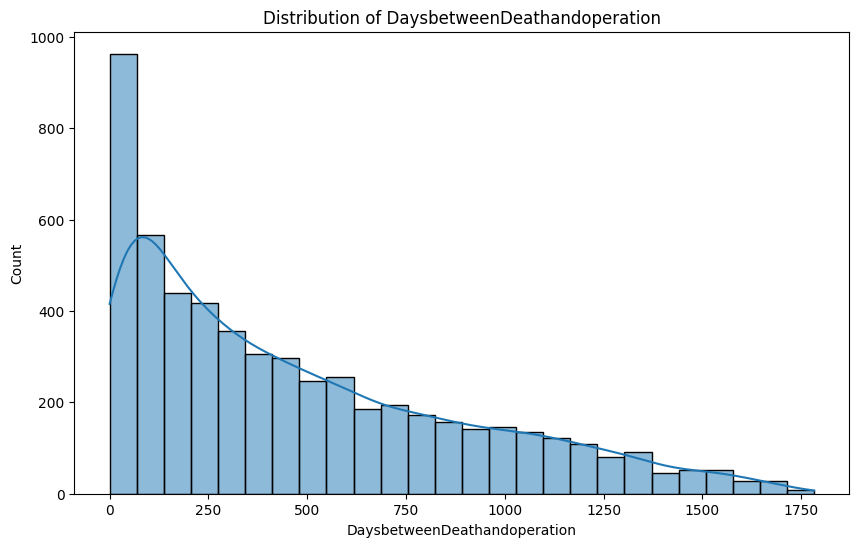

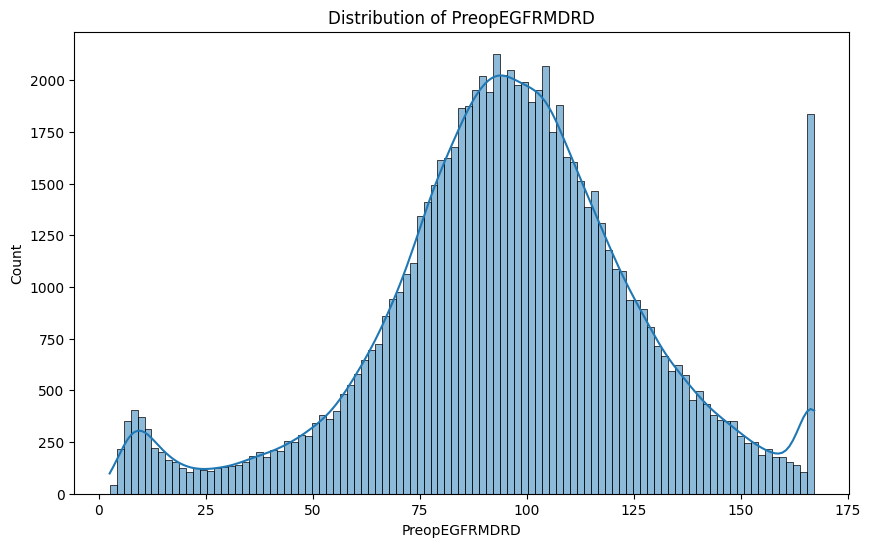

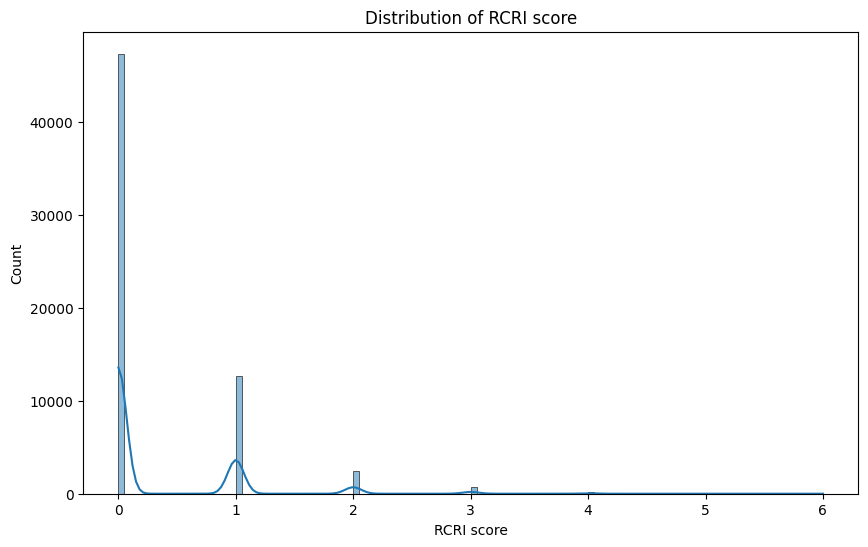

In [9]:

# Distribution of continuous variables
numeric_columns = df_cleaned_1.select_dtypes(include=['float64', 'int64']).columns

# Histplot
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_cleaned_1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [10]:
# Calculate the median of the 'RCRI score' column
median_rcri_score = df_cleaned_1['RCRI score'].median()

# Replace missing values in the 'RCRI score' column with the median
df_cleaned_1['RCRI score'].fillna(median_rcri_score, inplace=True)

# Check if there are any remaining missing values in the 'RCRI score' column
print(df_cleaned_1['RCRI score'].isnull().sum())

df_cleaned_1['RCRI score'] = df_cleaned_1['RCRI score'].astype('category')


0


In [11]:
impute_cols = ['PreopEGFRMDRD']
median_rename = ['impMedian_' + item for item in impute_cols]


impMedian = SimpleImputer(strategy='median')
df_cleaned_1[median_rename] = impMedian.fit_transform(df_cleaned_1[impute_cols])

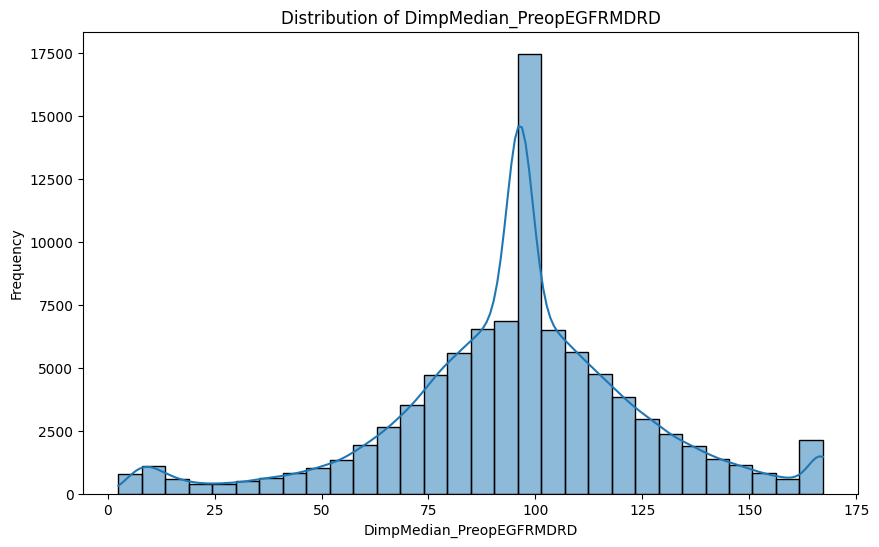

In [12]:
# Plot histogram for impMedian_PreopEGFRMDRD
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_1['impMedian_PreopEGFRMDRD'].dropna(), kde=True, bins=30)
plt.title('Distribution of DimpMedian_PreopEGFRMDRD')
plt.xlabel('DimpMedian_PreopEGFRMDRD')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the 'impMedian_PreopEGFRMDRD' column
df_cleaned_1['impMedian_PreopEGFRMDRD_normalized'] = scaler.fit_transform(df_cleaned_1[['impMedian_PreopEGFRMDRD']])

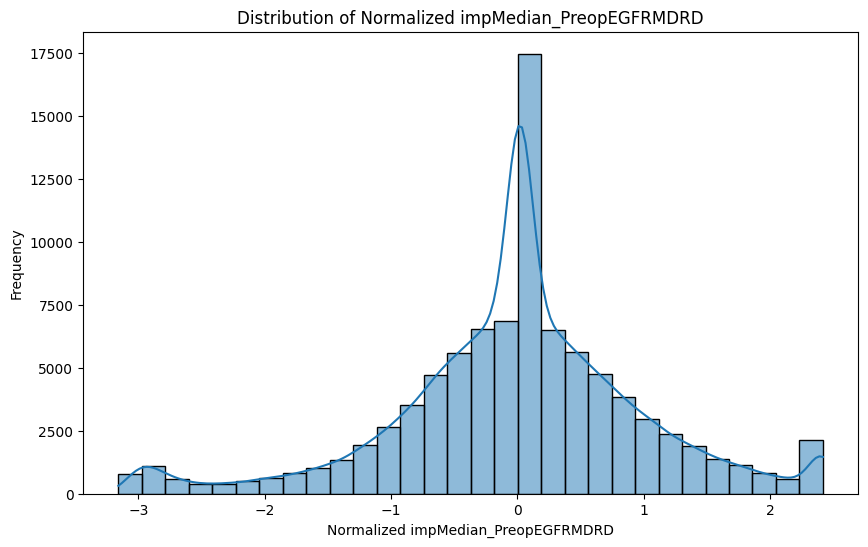

In [14]:
# Plot histogram for normalized data
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_1['impMedian_PreopEGFRMDRD_normalized'], kde=True, bins=30)
plt.title('Distribution of Normalized impMedian_PreopEGFRMDRD')
plt.xlabel('Normalized impMedian_PreopEGFRMDRD')
plt.ylabel('Frequency')
plt.show()

Number of missing values after imputation: 0


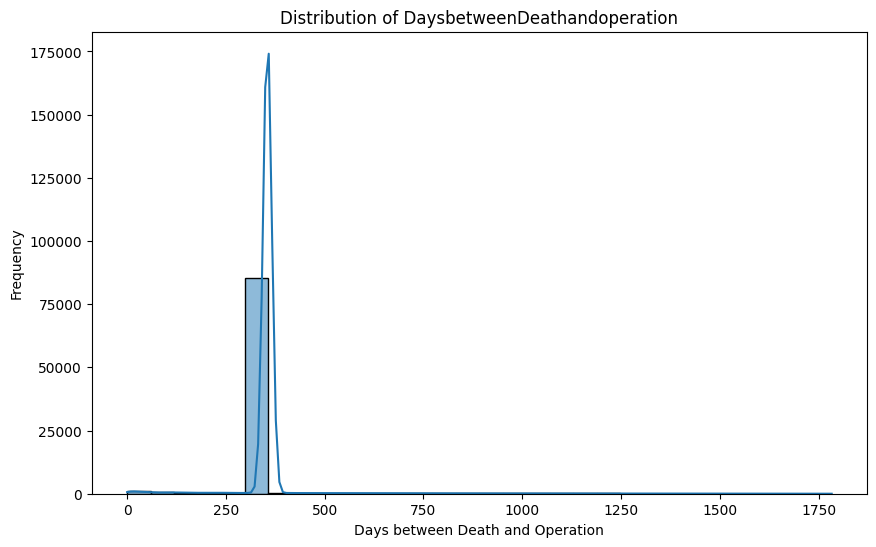

In [15]:
# Initialize the imputer
imputer = SimpleImputer(strategy='median')

# Impute the missing values in 'DaysbetweenDeathandoperation'
df_cleaned_1['DaysbetweenDeathandoperation'] = imputer.fit_transform(df_cleaned_1[['DaysbetweenDeathandoperation']])

# Check for any remaining missing values
print("Number of missing values after imputation:", df_cleaned_1['DaysbetweenDeathandoperation'].isnull().sum())


# Plot the histogram of log-transformed values
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_1['DaysbetweenDeathandoperation'], kde=True, bins=30)
plt.title('Distribution of DaysbetweenDeathandoperation')
plt.xlabel('Days between Death and Operation')
plt.ylabel('Frequency')
plt.show()

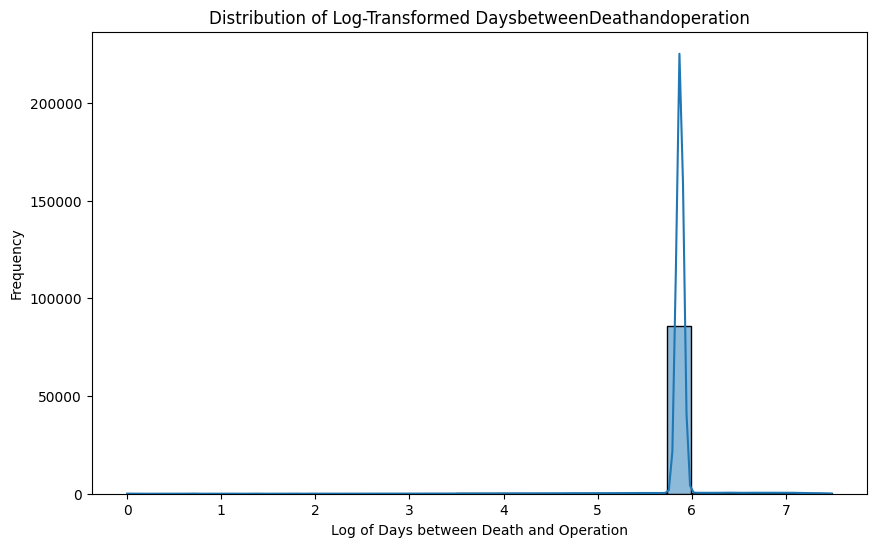

In [16]:
# Apply log transformation
df_cleaned_1['DaysbetweenDeathandoperation_log'] = np.log1p(df_cleaned_1['DaysbetweenDeathandoperation'])

# Plot the histogram of log-transformed values
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_1['DaysbetweenDeathandoperation_log'], kde=True, bins=30)
plt.title('Distribution of Log-Transformed DaysbetweenDeathandoperation')
plt.xlabel('Log of Days between Death and Operation')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Identify skewness
skewed_columns = []
numeric_columns = df_cleaned_1.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    # Compute skewness for the column
    skew_score = stats.skew(df_cleaned_1[col].dropna())
    # Identify if the skewness is above a certain threshold
    if skew_score > 3 or skew_score < -3:
        skewed_columns.append(col)

skewed_columns

['DaysbetweenDeathandoperation', 'DaysbetweenDeathandoperation_log']

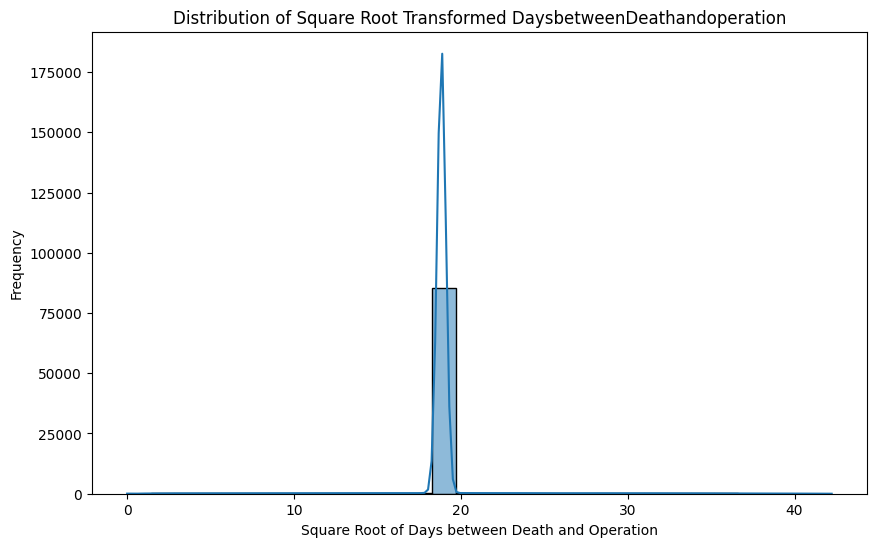

In [18]:
# Apply square root transformation
df_cleaned_1['DaysbetweenDeathandoperation_sqrt'] = np.sqrt(df_cleaned_1['DaysbetweenDeathandoperation'])

# Plot the histogram of square root transformed values
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_1['DaysbetweenDeathandoperation_sqrt'], kde=True, bins=30)
plt.title('Distribution of Square Root Transformed DaysbetweenDeathandoperation')
plt.xlabel('Square Root of Days between Death and Operation')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Identify skewness
skewed_columns = []
numeric_columns = df_cleaned_1.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    # Compute skewness for the column
    skew_score = stats.skew(df_cleaned_1[col].dropna())
    # Identify if the skewness is above a certain threshold
    if skew_score > 3 or skew_score < -3:
        skewed_columns.append(col)

skewed_columns

['DaysbetweenDeathandoperation', 'DaysbetweenDeathandoperation_log']

Let's use 'DaysbetweenDeathandoperation_sqrt'then.

In [20]:
df_cleaned_1 = df_cleaned_1.drop(['Mortality','Anemia category', 'PreopEGFRMDRD', 'impMedian_PreopEGFRMDRD','DaysbetweenDeathandoperation','DaysbetweenDeathandoperation_log'], axis=1)
df_cleaned_1.head()

,AGEcategory,GENDER,RaceCategory,thirtydaymortality,ICUAdmgt24h,Anemiacategorybinned,GradeofKidneydisease,GradeofKidneyCategory,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,TransfusionIntraandpostopCategory,AnaestypeCategory,PriorityCategory,RCRI score,RCRI_Risk,SurgRiskCategory,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,RDW15.7,ASAcategorybinned,impMedian_PreopEGFRMDRD_normalized,DaysbetweenDeathandoperation_sqrt
0,30-49,FEMALE,Chinese,No,no,#NULL!,BLANK,#NULL!,0,0,0,0,0 units,GA,Elective,0.0,#NULL!,Low,#NULL!,#NULL!,#NULL!,#NULL!,no,#NULL!,I,0.020473,18.841444
1,30-49,FEMALE,Chinese,No,no,NaN,BLANK,#NULL!,0,0,0,0,0 units,GA,Elective,0.0,#NULL!,Low,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,<= 15.7,I,0.020473,18.841444
2,50-64,FEMALE,Chinese,No,no,Mild,G1,G1,0,0,0,0,0 units,GA,Elective,0.0,#NULL!,Low,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,<= 15.7,I,1.922307,18.841444
3,65-74,MALE,Chinese,No,no,Moderate/Severe,G1,G1,0,1,0,1,1 unit,GA,Elective,0.0,#NULL!,Moderate,#NULL!,#NULL!,#NULL!,#NULL!,no,<= 15.7,I,0.726223,18.841444
4,65-74,MALE,Chinese,No,no,Mild,G1,G1,0,0,0,0,0 units,GA,Elective,0.0,I,Low,no,no,no,no,no,>15.7,II,0.096787,7.681146


In [21]:
# Identify outliers using z-scores
outlier_columns = []
numeric_columns = df_cleaned_1.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numeric column
for col in numeric_columns:
    # Compute z-scores for the column
    z_scores = np.abs(stats.zscore(df_cleaned_1[col].dropna()))
    # Identify if there are any outliers
    if np.any(z_scores > 3):
        outlier_columns.append(col)

outlier_columns

['impMedian_PreopEGFRMDRD_normalized', 'DaysbetweenDeathandoperation_sqrt']

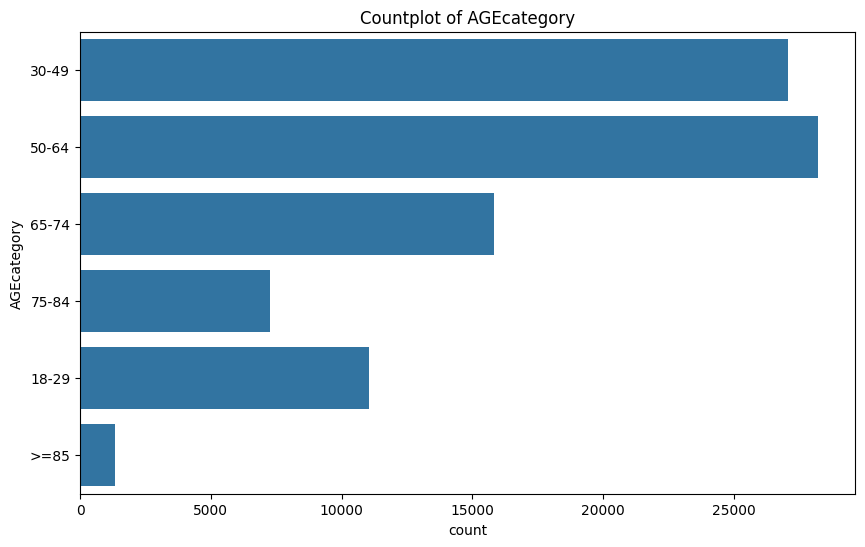

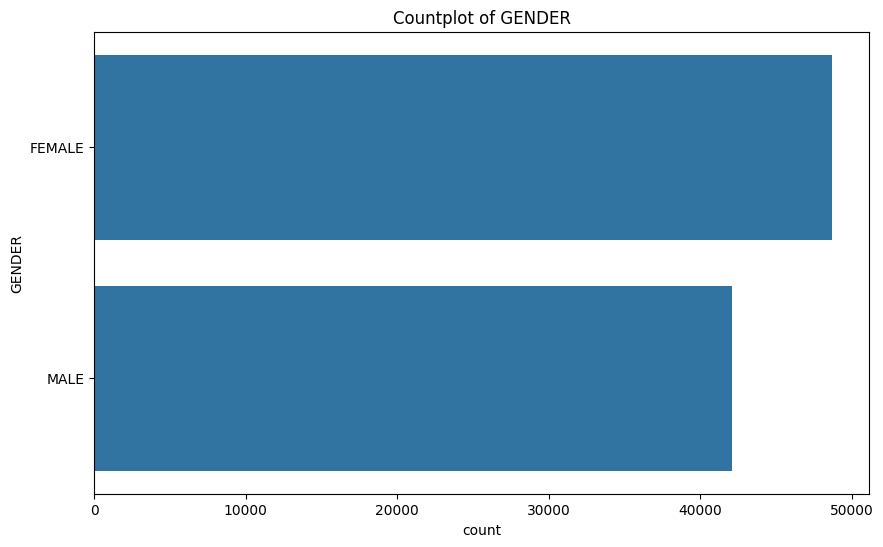

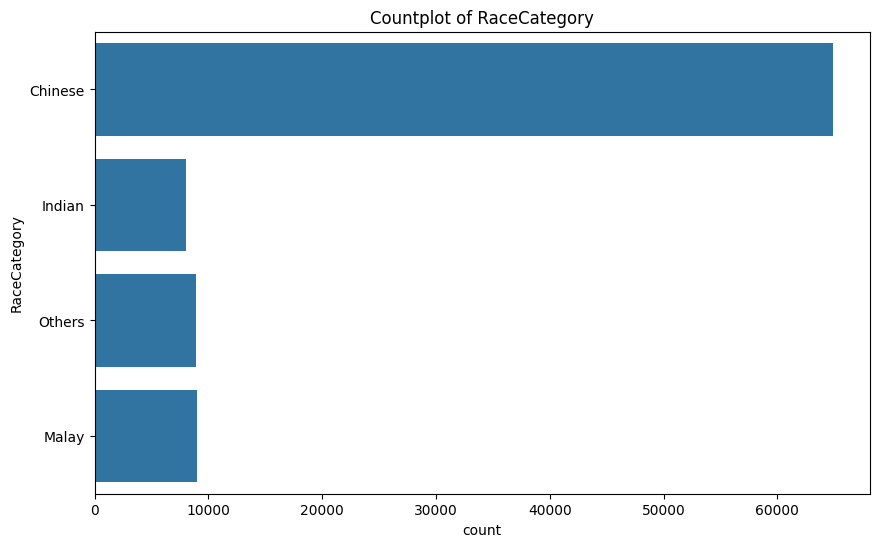

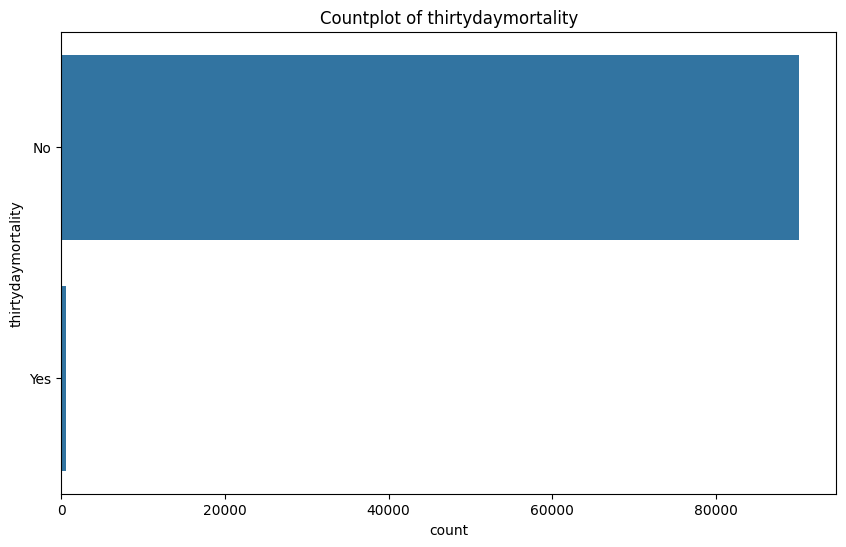

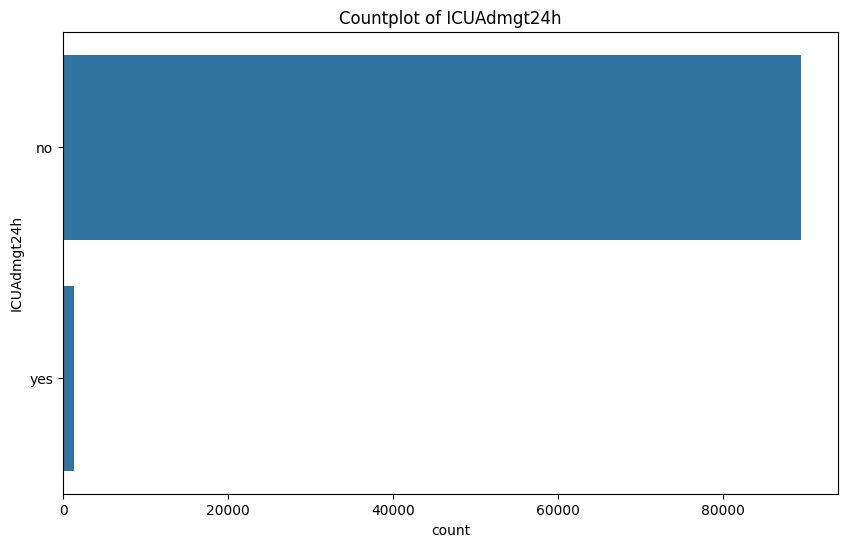

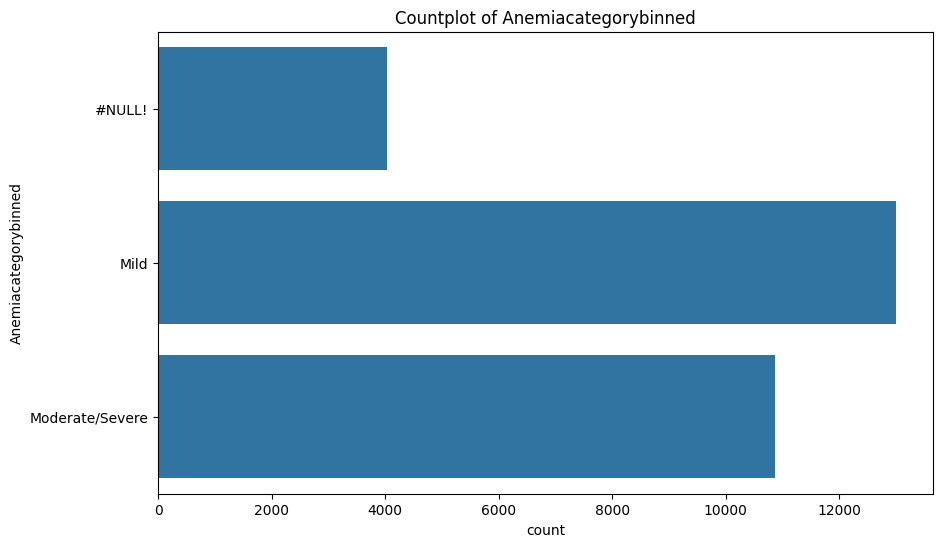

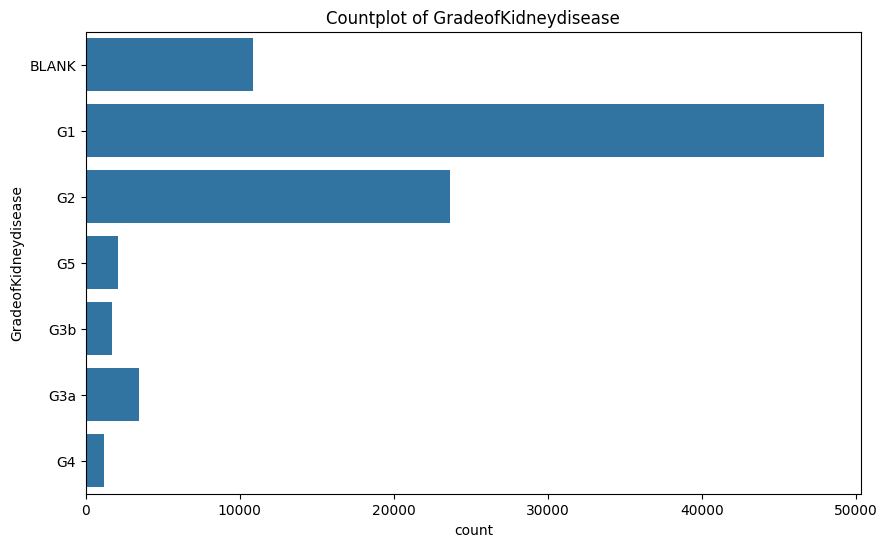

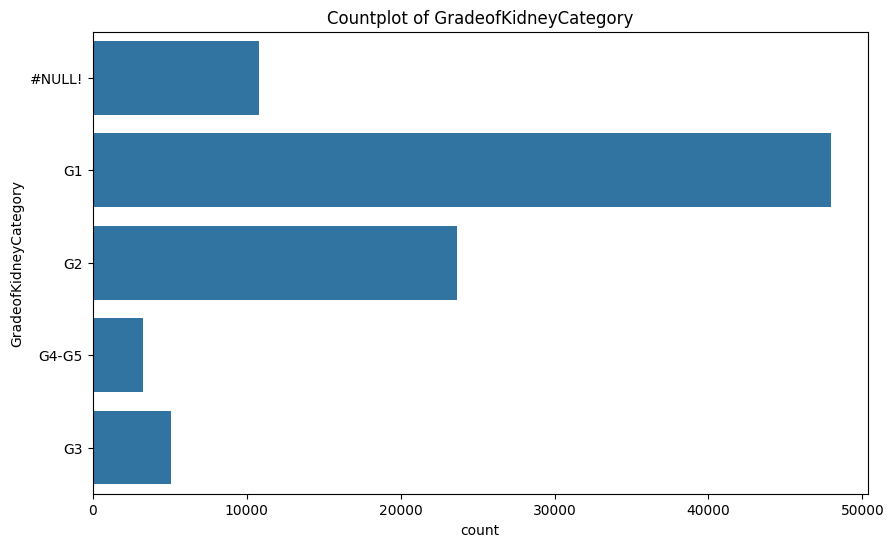

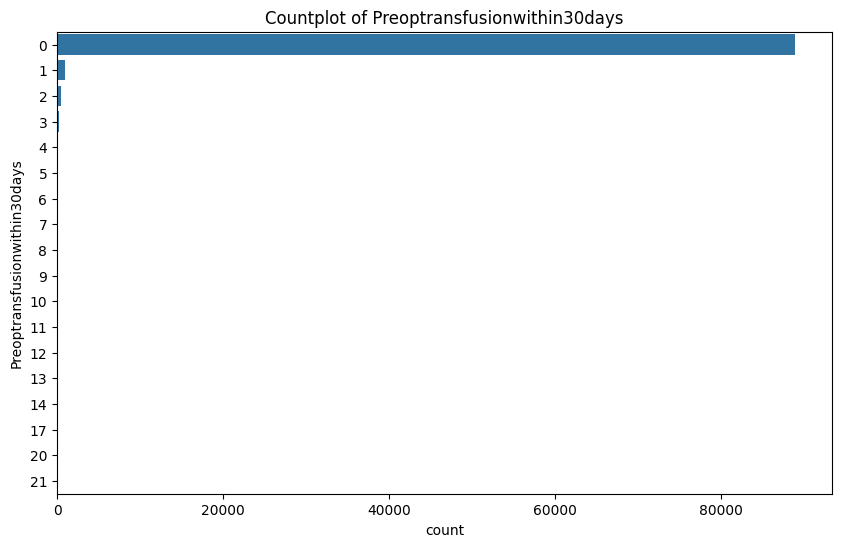

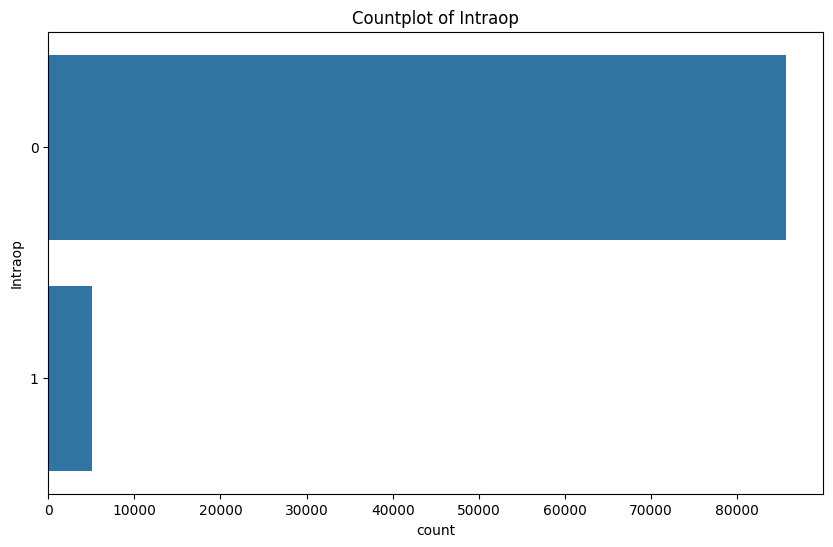

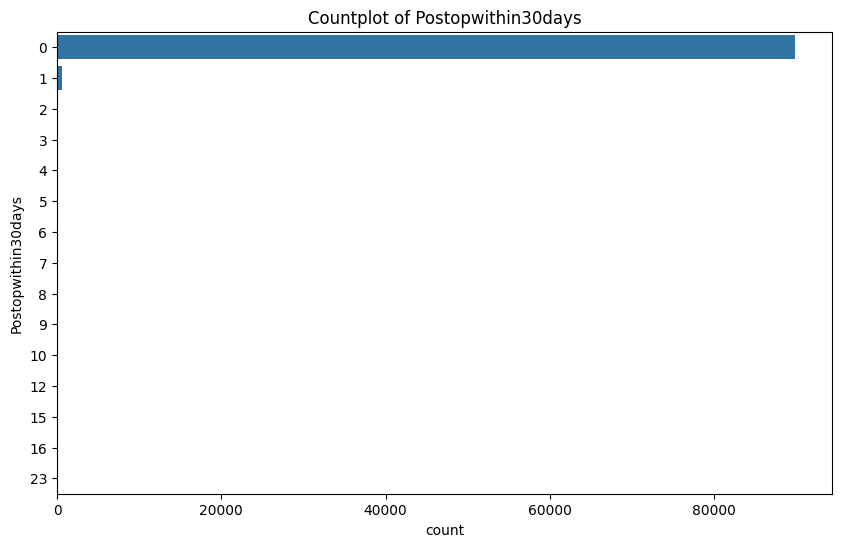

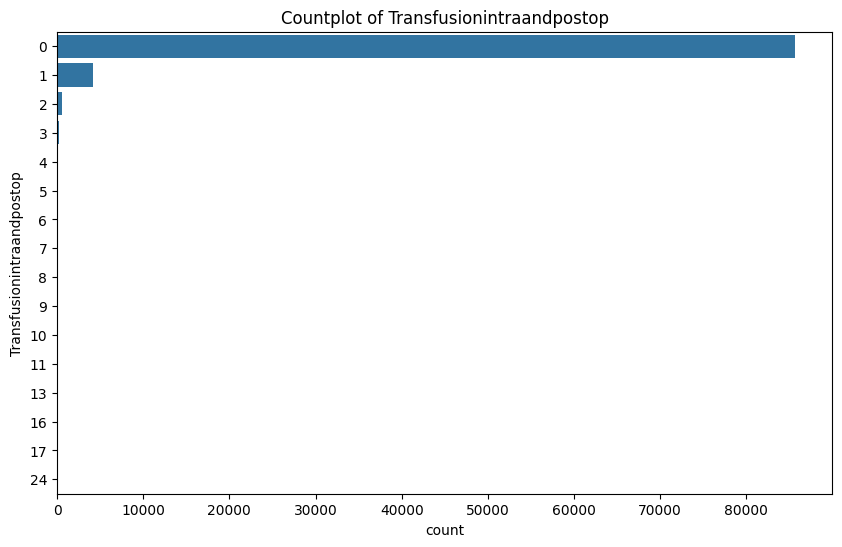

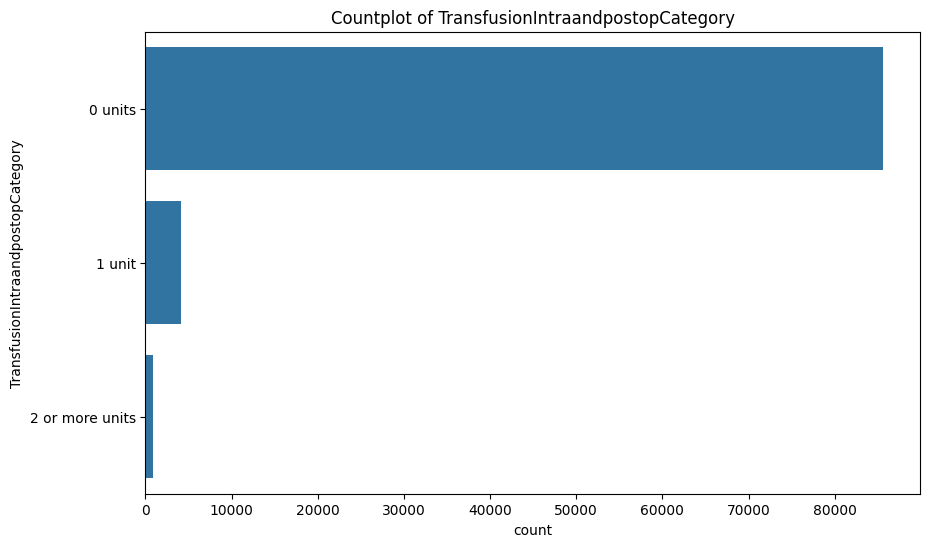

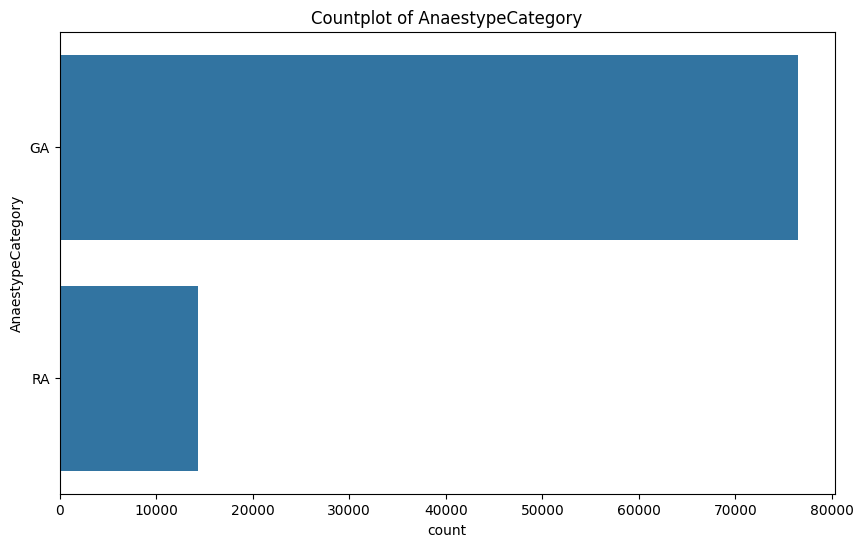

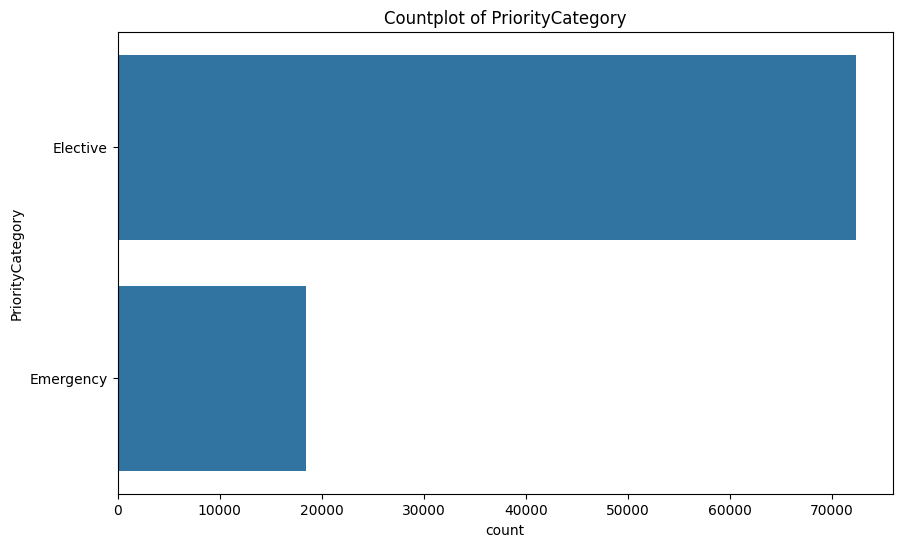

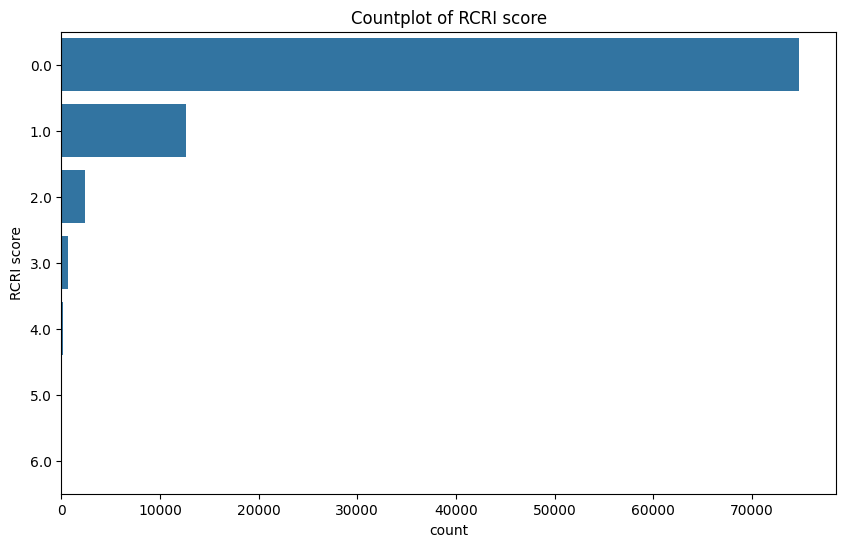

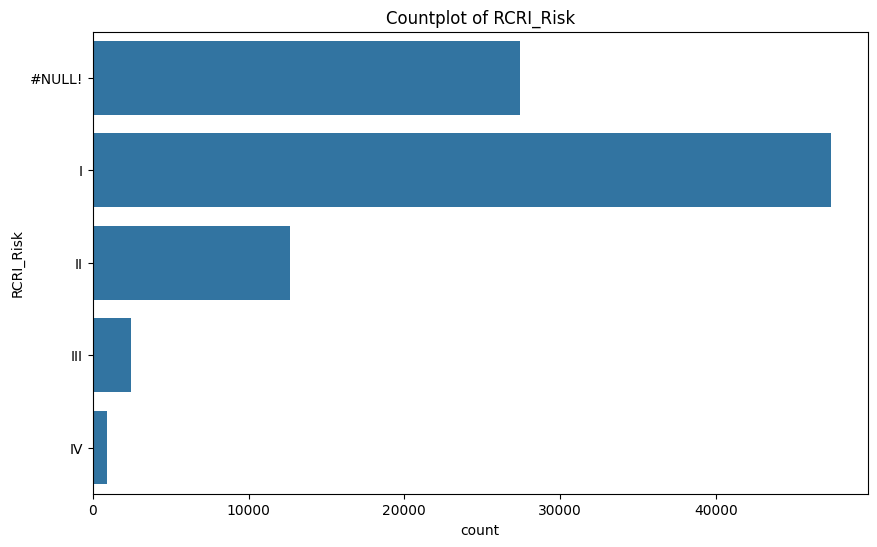

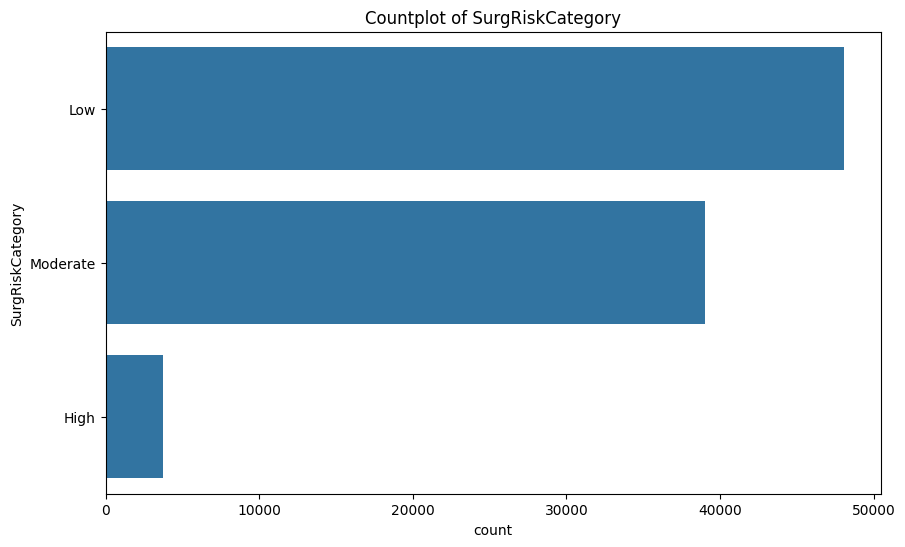

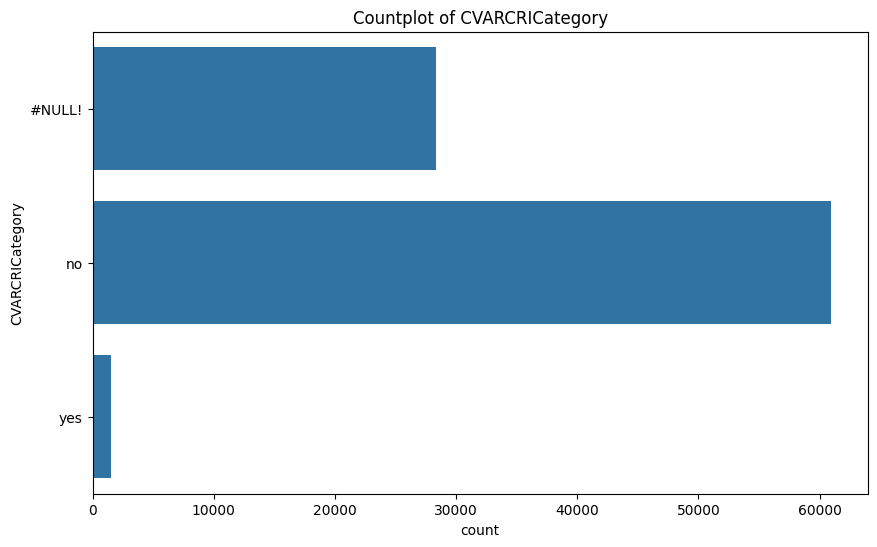

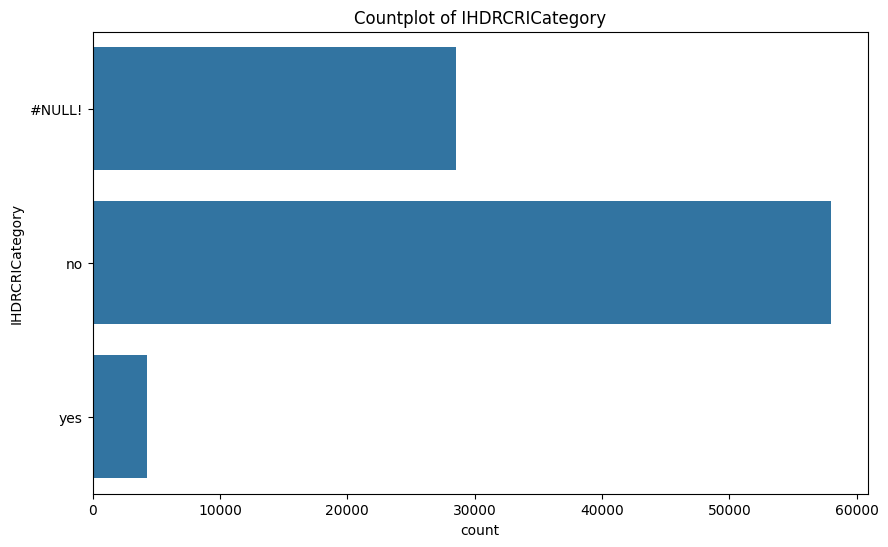

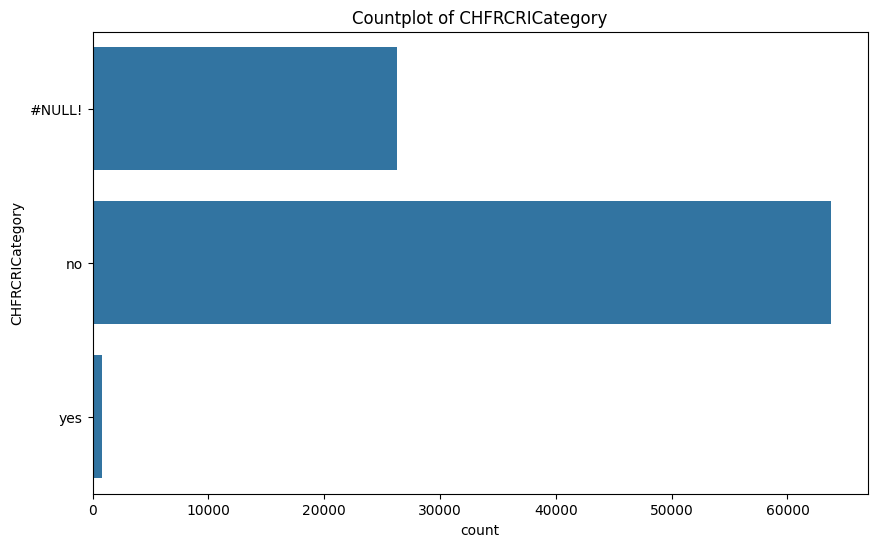

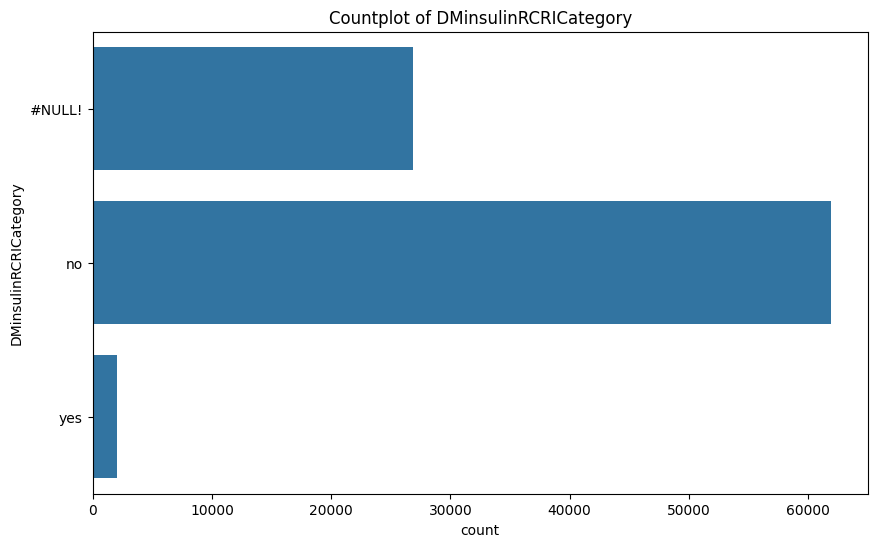

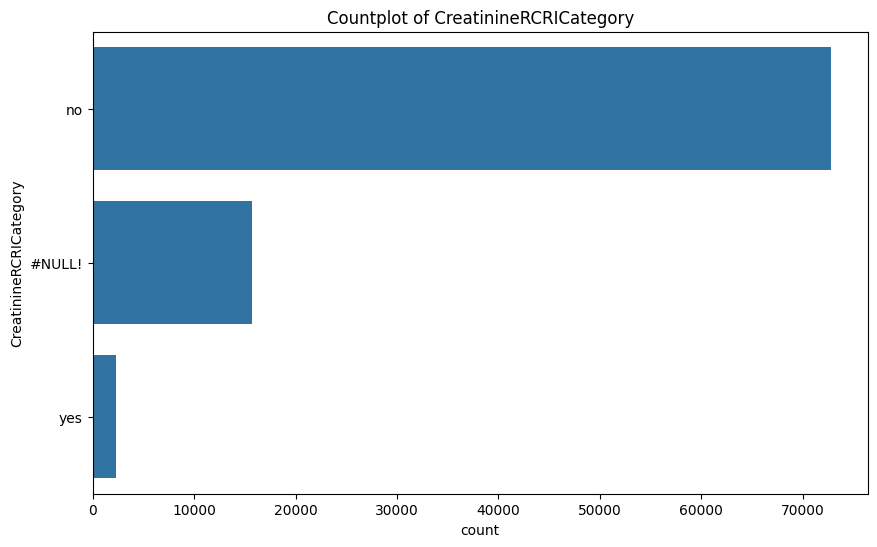

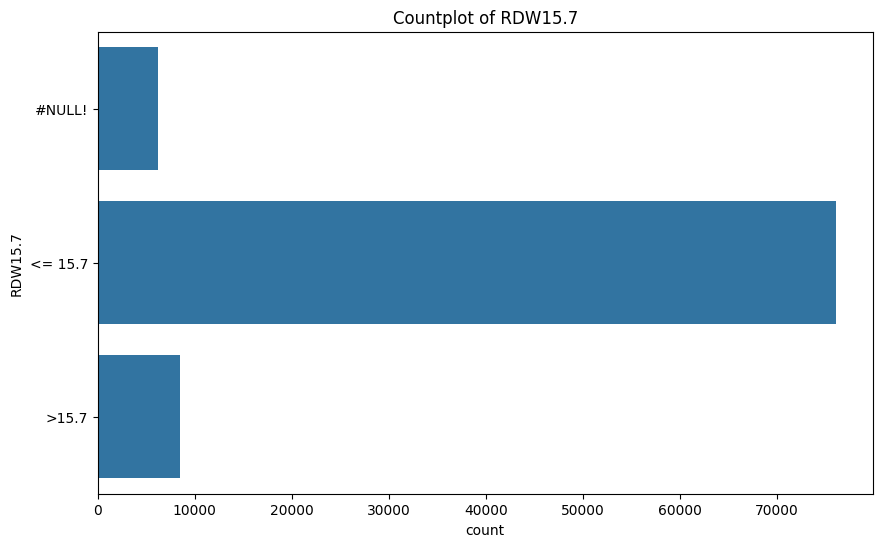

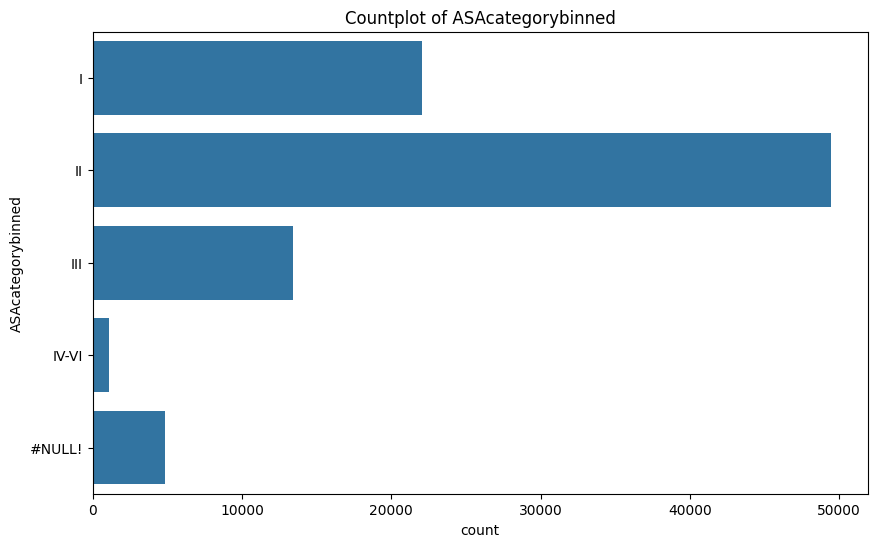

In [22]:
# Define categorical variables
categorical_vars = df_cleaned_1.select_dtypes(include=['object', 'category']).columns

# Countplot
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_cleaned_1[var])
    plt.title(f'Countplot of {var}')
    plt.show()

In [23]:
# Define binning for Preoptransfusionwithin30days
bins_preop = [0, 1, 3, 6, np.inf]
labels_preop = ['0', '1-2', '3-5', '6+']
df_cleaned_1['Preoptransfusionwithin30days_binned'] = pd.cut(df_cleaned_1['Preoptransfusionwithin30days'], bins=bins_preop, labels=labels_preop, right=False)

# Define binning for Postopwithin30days
bins_postop = [0, 1, 3, 6, np.inf]
labels_postop = ['0', '1-2', '3-5', '6+']
df_cleaned_1['Postopwithin30days_binned'] = pd.cut(df_cleaned_1['Postopwithin30days'], bins=bins_postop, labels=labels_postop, right=False)

# Define binning for Transfusionintraandpostop
bins_transfusion = [0, 1, 3, 6, np.inf]
labels_transfusion = ['0', '1-2', '3-5', '6+']
df_cleaned_1['Transfusionintraandpostop_binned'] = pd.cut(df_cleaned_1['Transfusionintraandpostop'], bins=bins_transfusion, labels=labels_transfusion, right=False)

In [24]:
# Drop the 'TransfusionIntraandpostopCategory' column
df_cleaned_1 = df_cleaned_1.drop(columns=['TransfusionIntraandpostopCategory'])

In [25]:
# Drop the columns

df_cleaned_1 = df_cleaned_1.drop(columns=['Preoptransfusionwithin30days','Postopwithin30days','Transfusionintraandpostop'], axis=1)

In [27]:
df_cleaned_1.head()

df_cleaned_1.to_csv(os.path.join(main_path,'df_cleaned_1.csv'), index=False)


# 4. Feature Engineering for Modeling.
## 4.1 Feature engineering

In [29]:
df_cleaned_1 = pd.read_csv(os.path.join(main_path, 'df_cleaned_1.csv'))

In [30]:
# List of categorical columns to be one-hot encoded
categorical_columns = [
    'AGEcategory', 'GENDER', 'RaceCategory', 'Anemiacategorybinned',
    'GradeofKidneydisease', 'GradeofKidneyCategory',
    'AnaestypeCategory', 'PriorityCategory', 'RCRI score', 'RCRI_Risk', 'SurgRiskCategory', 'CVARCRICategory',
    'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory', 'CreatinineRCRICategory',
    'RDW15.7', 'ASAcategorybinned', 'Preoptransfusionwithin30days_binned',
    'Postopwithin30days_binned', 'Transfusionintraandpostop_binned', 'Intraop'
]
# Perform one-hot encoding
df_cleaned_1_encoded = pd.get_dummies(df_cleaned_1, columns=categorical_columns)

# Print out the first few rows to check the result
print(df_cleaned_1_encoded.head())
df_cleaned_1_encoded.describe()

  thirtydaymortality ICUAdmgt24h  impMedian_PreopEGFRMDRD_normalized  \
0                 No          no                            0.020473   
1                 No          no                            0.020473   
2                 No          no                            1.922307   
3                 No          no                            0.726223   
4                 No          no                            0.096787   

   DaysbetweenDeathandoperation_sqrt  AGEcategory_18-29  AGEcategory_30-49  \
0                          18.841444              False               True   
1                          18.841444              False               True   
2                          18.841444              False              False   
3                          18.841444              False              False   
4                           7.681146              False              False   

   AGEcategory_50-64  AGEcategory_65-74  AGEcategory_75-84  AGEcategory_>=85  \
0              Fal

,impMedian_PreopEGFRMDRD_normalized,DaysbetweenDeathandoperation_sqrt
count,9.077900e+04,90779.000000
mean,-7.191605e-16,18.869882
std,1.000006e+00,2.536424
min,-3.159104e+00,0.000000
25%,-4.749627e-01,18.841444
50%,2.047313e-02,18.841444
75%,5.300155e-01,18.841444
max,2.417528e+00,42.225585


## 4.2 Define the features, target columns and Checking for Data Imbalance

Column names in the features DataFrame:
['impMedian_PreopEGFRMDRD_normalized', 'AGEcategory_18-29', 'AGEcategory_30-49', 'AGEcategory_50-64', 'AGEcategory_65-74', 'AGEcategory_75-84', 'AGEcategory_>=85', 'GENDER_FEMALE', 'GENDER_MALE', 'RaceCategory_Chinese', 'RaceCategory_Indian', 'RaceCategory_Malay', 'RaceCategory_Others', 'Anemiacategorybinned_#NULL!', 'Anemiacategorybinned_Mild', 'Anemiacategorybinned_Moderate/Severe', 'GradeofKidneydisease_BLANK', 'GradeofKidneydisease_G1', 'GradeofKidneydisease_G2', 'GradeofKidneydisease_G3a', 'GradeofKidneydisease_G3b', 'GradeofKidneydisease_G4', 'GradeofKidneydisease_G5', 'GradeofKidneyCategory_#NULL!', 'GradeofKidneyCategory_G1', 'GradeofKidneyCategory_G2', 'GradeofKidneyCategory_G3', 'GradeofKidneyCategory_G4-G5', 'AnaestypeCategory_GA', 'AnaestypeCategory_RA', 'PriorityCategory_Elective', 'PriorityCategory_Emergency', 'RCRI score_0.0', 'RCRI score_1.0', 'RCRI score_2.0', 'RCRI score_3.0', 'RCRI score_4.0', 'RCRI score_5.0', 'RCRI score_6.0'

<ipython-input-31-8c0e4a46fac7>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_mortality_numeric.value_counts().index, y=target_mortality_numeric.value_counts(normalize=True), palette='Blues')
<ipython-input-31-8c0e4a46fac7>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_icu_numeric.value_counts().index, y=target_icu_numeric.value_counts(normalize=True), palette='Reds')


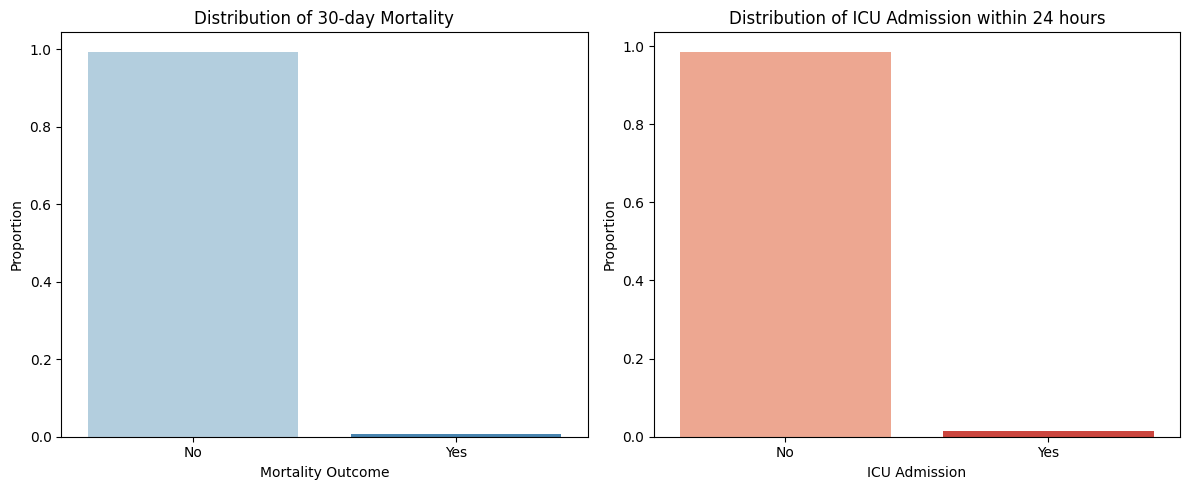

In [31]:
# Define the features and target columns
features = df_cleaned_1_encoded.drop(['thirtydaymortality', 'ICUAdmgt24h', 'DaysbetweenDeathandoperation_sqrt'], axis=1)
target_mortality = df_cleaned_1_encoded['thirtydaymortality']
target_icu = df_cleaned_1_encoded['ICUAdmgt24h']
target_days_to_death = df_cleaned_1_encoded['DaysbetweenDeathandoperation_sqrt']

# Print all column names
print("Column names in the features DataFrame:")
print(features.columns.tolist())

features.columns = features.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '').str.replace('>', '').str.replace('#', 'Num')

# Convert categorical targets to numeric values
target_mortality_numeric = target_mortality.map({'No': 0, 'Yes': 1})
target_icu_numeric = target_icu.map({'no': 0, 'yes': 1})

# Checking the imbalance in the dataset
print("Distribution of 30-day mortality:")
print(target_mortality_numeric.value_counts(normalize=True))  # normalize=True gives the proportion

print("\nDistribution of ICU Admission within 24 hours post-surgery:")
print(target_icu_numeric.value_counts(normalize=True))

# Create a figure for the plots
plt.figure(figsize=(12, 5))

# Plot for 30-day mortality
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x=target_mortality_numeric.value_counts().index, y=target_mortality_numeric.value_counts(normalize=True), palette='Blues')
plt.title('Distribution of 30-day Mortality')
plt.xlabel('Mortality Outcome')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['No', 'Yes'])

# Plot for ICU Admission
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x=target_icu_numeric.value_counts().index, y=target_icu_numeric.value_counts(normalize=True), palette='Reds')
plt.title('Distribution of ICU Admission within 24 hours')
plt.xlabel('ICU Admission')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['No', 'Yes'])

# Show the plots
plt.tight_layout()
plt.show()






## 4.3 Handling Imbalanced Data with SMOTE

In [32]:
# Check if any values have not been converted
print("Unique values in mortality target after mapping:", target_mortality_numeric.unique())
print("Unique values in ICU target after mapping:", target_icu_numeric.unique())

# Ensure no NaN values that could result from incorrect mapping
if target_mortality_numeric.isnull().any() or target_icu_numeric.isnull().any():
    print("NaN values found. Check mapping keys and data consistency.")

Unique values in mortality target after mapping: [0 1]
Unique values in ICU target after mapping: [0 1]


Shapes of 30-day mortality dataset:
Original training set: (72623, 84), SMOTE-applied training set: (144400, 84)
Testing set: (18156, 84)

Shapes of ICU admission dataset:
Original training set: (72623, 84), SMOTE-applied training set: (143278, 84)
Testing set: (18156, 84)

New distribution of 30-day mortality after SMOTE:
thirtydaymortality
0    0.5
1    0.5
Name: proportion, dtype: float64


<ipython-input-33-7d64d2effb98>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.Series(y_train_mortality_smote).value_counts().index, y=pd.Series(y_train_mortality_smote).value_counts(normalize=True), palette='Blues')
<ipython-input-33-7d64d2effb98>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.Series(y_train_icu_smote).value_counts().index, y=pd.Series(y_train_icu_smote).value_counts(normalize=True), palette='Reds')


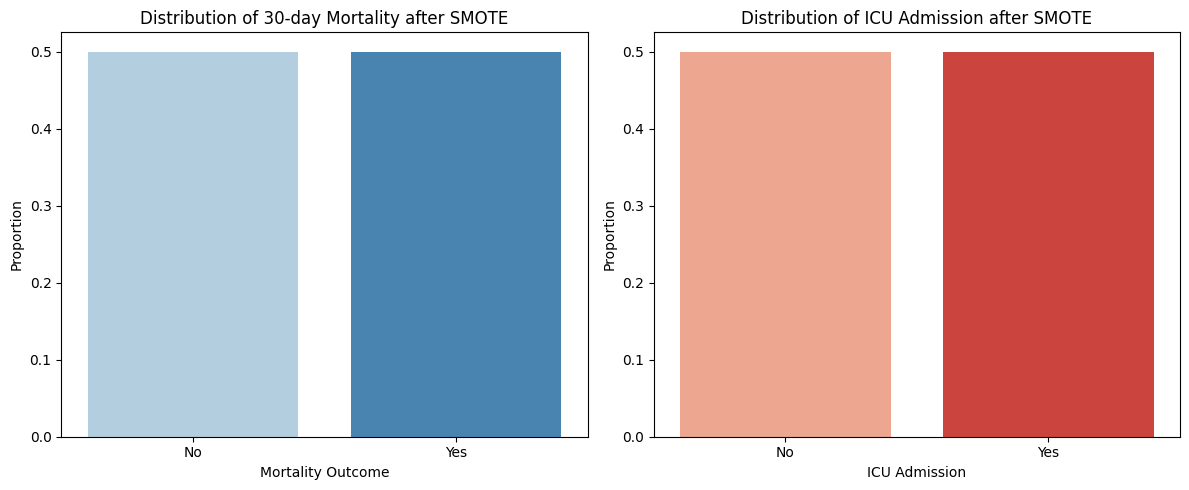

In [33]:
# Correct the split into separate training and testing sets for mortality and ICU admission
X_train_mortality, X_test_mortality, y_train_mortality, y_test_mortality = train_test_split(features, target_mortality_numeric, test_size=0.2, random_state=2024)
X_train_icu, X_test_icu, y_train_icu, y_test_icu = train_test_split(features, target_icu_numeric, test_size=0.2, random_state=2024)

# Apply SMOTE for the 30-day mortality
smote_mortality = SMOTE(random_state=2024)
X_train_mortality_smote, y_train_mortality_smote = smote_mortality.fit_resample(X_train_mortality, y_train_mortality)

# Apply SMOTE for the ICU admission
smote_icu = SMOTE(random_state=2024)
X_train_icu_smote, y_train_icu_smote = smote_icu.fit_resample(X_train_icu, y_train_icu)

# Print the shapes of the resulting datasets
print(f"Shapes of 30-day mortality dataset:")
print(f"Original training set: {X_train_mortality.shape}, SMOTE-applied training set: {X_train_mortality_smote.shape}")
print(f"Testing set: {X_test_mortality.shape}")

print(f"\nShapes of ICU admission dataset:")
print(f"Original training set: {X_train_icu.shape}, SMOTE-applied training set: {X_train_icu_smote.shape}")
print(f"Testing set: {X_test_icu.shape}")

# Check and visualize the new class distributions
print("\nNew distribution of 30-day mortality after SMOTE:")
print(pd.Series(y_train_mortality_smote).value_counts(normalize=True))

plt.figure(figsize=(12, 5))

# Plot for 30-day mortality after SMOTE
plt.subplot(1, 2, 1)
sns.barplot(x=pd.Series(y_train_mortality_smote).value_counts().index, y=pd.Series(y_train_mortality_smote).value_counts(normalize=True), palette='Blues')
plt.title('Distribution of 30-day Mortality after SMOTE')
plt.xlabel('Mortality Outcome')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['No', 'Yes'])  # Adjusted for clarity

# Plot for ICU admission after SMOTE
plt.subplot(1, 2, 2)
sns.barplot(x=pd.Series(y_train_icu_smote).value_counts().index, y=pd.Series(y_train_icu_smote).value_counts(normalize=True), palette='Reds')
plt.title('Distribution of ICU Admission after SMOTE')
plt.xlabel('ICU Admission')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['No', 'Yes'])  # Adjusted for clarity

plt.tight_layout()
plt.show()

# 5. Model Development, Training, and Evaluation
## 5.1 Define functions

In [34]:
def plot_roc_curve(y_true, y_scores, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(y_true)))  # Assuming y_true is binary [0,1]
    plt.xticks(tick_marks, ['0', '1'], rotation=45)
    plt.yticks(tick_marks, ['0', '1'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## 5.2. Task1: Stacking Classifier for Mortality within 30 Days of Surgery
### Define and Train the Model

Stacking Classifier - 30-day Mortality Accuracy: 0.9918
Precision: 0.1522, Recall: 0.0603, F1-Score: 0.0864


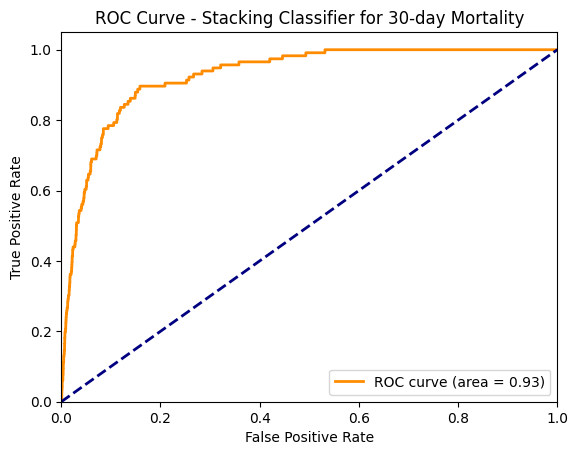

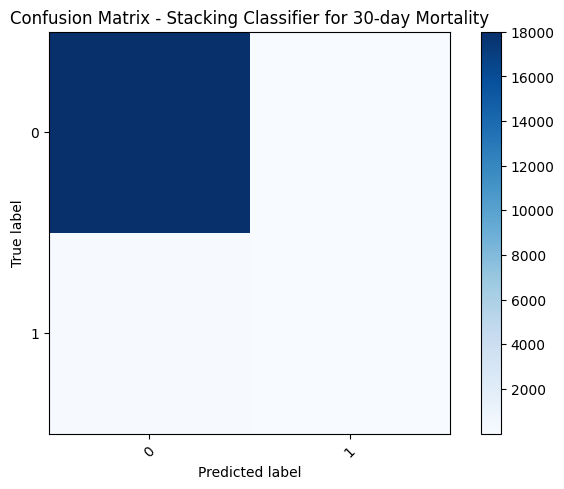

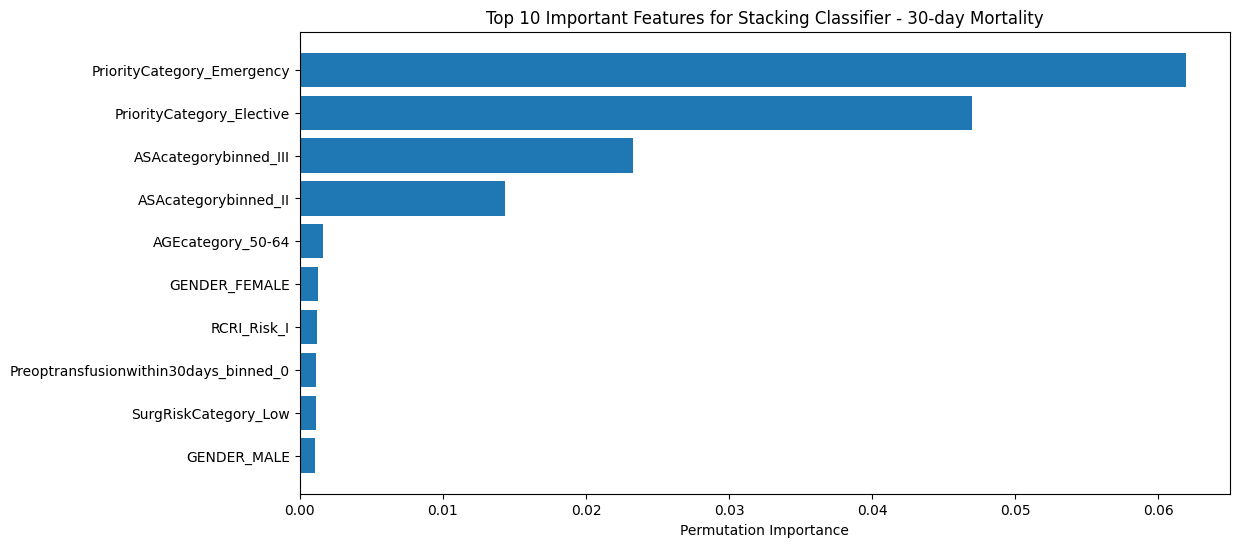

In [69]:
# Define base models
estimators = [
    ('rf', RandomForestClassifier(random_state=2024)),
    ('xgb', XGBClassifier(random_state=2024, eval_metric='logloss')),
    ('lr_l1', LogisticRegression(penalty='l1', solver='liblinear', random_state=2024, max_iter=500)),
    ('lr_l2', LogisticRegression(penalty='l2', solver='liblinear', random_state=2024, max_iter=500))
]

# Define stacking classifier for 30-day mortality
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# Train the model
stacking_clf.fit(X_train_mortality_smote, y_train_mortality_smote)

# Make predictions
y_pred_mortality_stacking = stacking_clf.predict(X_test_mortality)
y_pred_proba_mortality_stacking = stacking_clf.predict_proba(X_test_mortality)[:, 1]

# Evaluate the model
accuracy_mortality_stacking = accuracy_score(y_test_mortality, y_pred_mortality_stacking)
precision_stacking, recall_stacking, f1_stacking, _ = precision_recall_fscore_support(y_test_mortality, y_pred_mortality_stacking, average='binary')
print(f"Stacking Classifier - 30-day Mortality Accuracy: {accuracy_mortality_stacking:.4f}")
print(f"Precision: {precision_stacking:.4f}, Recall: {recall_stacking:.4f}, F1-Score: {f1_stacking:.4f}")

# Plot ROC curve
plot_roc_curve(y_test_mortality, y_pred_proba_mortality_stacking, 'ROC Curve - Stacking Classifier for 30-day Mortality')

# Plot confusion matrix
plot_confusion_matrix(y_test_mortality, y_pred_mortality_stacking, 'Confusion Matrix - Stacking Classifier for 30-day Mortality')

# Feature Importance
perm_importance = permutation_importance(stacking_clf, X_test_mortality, y_test_mortality, n_repeats=10, random_state=2024)
sorted_idx = perm_importance.importances_mean.argsort()[-10:]

# Plot the top 10 important features
plt.figure(figsize=(12, 6))
plt.barh(np.array(features.columns)[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Top 10 Important Features for Stacking Classifier - 30-day Mortality")
plt.show()

In [39]:
# Function to run XGBoost model with GridSearchCV
def xgboost_model(x_train, y_train, x_test, y_test, title):
    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }

    # Create a base model
    xgb_model = XGBClassifier(random_state=2024, eval_metric='logloss')

    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs= -1, verbose=2, scoring='roc_auc')  # pls use gpu, and set n_jobs=-1

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Print the best parameters and best score (AUC)
    print(f"Best parameters for {title}: {grid_search.best_params_}")
    print(f"Best AUC for {title}: {grid_search.best_score_}")

    # Use the best estimator to get the model
    best_model = grid_search.best_estimator_

    # Perform cross-validation and get AUC scores for training set
    kfold = KFold(n_splits=5, shuffle=True, random_state=2024)
    train_auc_cv = cross_val_score(best_model, x_train, y_train, cv=kfold, scoring='roc_auc')
    print(f'Cross-validated AUC for {title} (Train): {train_auc_cv.mean()} ± {train_auc_cv.std()}')

    # Fit the best model on the training data
    best_model.fit(x_train, y_train)

    # Calculate accuracy and AUC for the test set
    y_pred_test = best_model.predict(x_test)
    test_auc = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)

    print(f'Accuracy for Test ({title}): {test_accuracy}')
    print(f'AUC for Test ({title}): {test_auc}')
    print(f'Precision for Test ({title}): {test_precision}')
    print(f'Recall for Test ({title}): {test_recall}')
    print(f'F1 Score for Test ({title}): {test_f1}')

    # Feature Importance Analysis
    feature_importances = best_model.feature_importances_
    sorted_idx = np.argsort(feature_importances)[::-1]
    top_features = np.array(x_train.columns)[sorted_idx]

    print(f'Top 10 Features for {title}:')
    for i in range(10):
        print(f'{top_features[i]}: {feature_importances[sorted_idx[i]]}')

    # Plotting Feature Importance
    plt.figure(figsize=(10, 6))
    plt.barh(top_features[:10], feature_importances[sorted_idx][:10])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(f'Top 10 Feature Importances for {title}')
    plt.gca().invert_yaxis()
    plt.show()

    return best_model, y_pred_test


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   3.0s
[CV] END colsampl

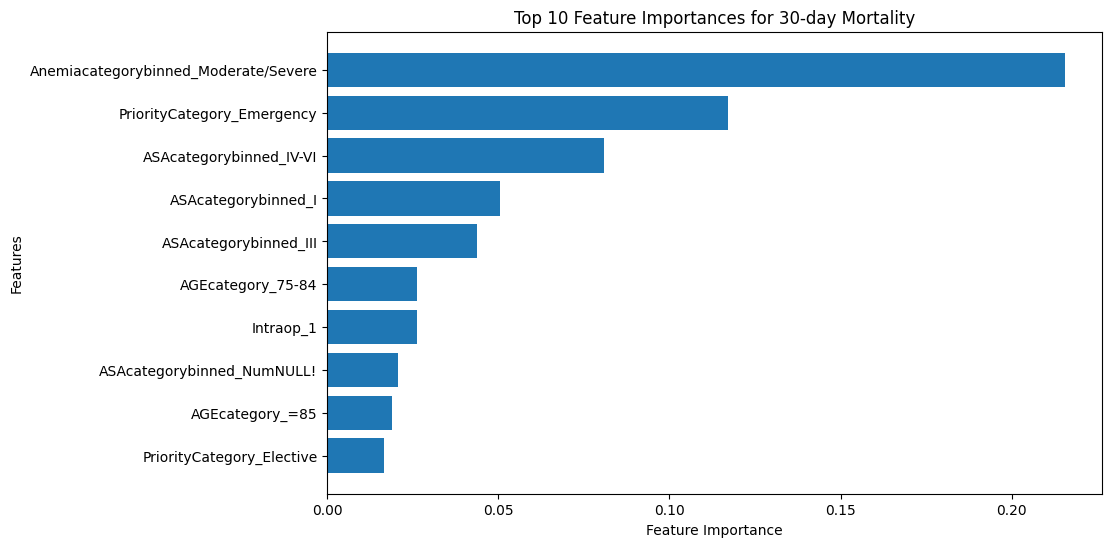

In [38]:
# For 30-day mortality
best_model_mortality, y_pred_test_mortality = xgboost_model(
    X_train_mortality_smote, y_train_mortality_smote, X_test_mortality, y_test_mortality, "30-day Mortality")


## 5.2 Task2: Stacking Classifier for ICU Admission within 24 Hours of Surgery
### Define and Train the Model

In [ ]:
# Train and evaluate the model for:
best_model_icu, y_pred_test_icu = xgboost_model(X_train_icu_smote, y_train_icu_smote, X_test_icu, y_test_icu, "ICU Admission within 24 Hours")

## 5.4 Task 3: Using a Cox proportional hazards model for predicting days from surgery to mortality

### Define and Train the Model

Using a Cox Proportional Hazards model for predicting days from surgery to mortality is an essential approach in survival analysis and offers several advantages:

1. Handling Censored Data:
Censoring: In medical studies, it is common to have censored data, where the event of interest (e.g., death) has not occurred for all patients by the end of the study period. The Cox model can handle right-censored data effectively, allowing us to utilize all available information without biasing the results.
2. Estimating Hazard Ratios:
Relative Risks: The Cox model provides hazard ratios for the covariates, which are interpretable as the relative risk of the event occurring. This helps in understanding the impact of different factors (e.g., age, gender, preoperative conditions) on the likelihood of mortality after surgery.
3. No Need for Parametric Assumptions:
Non-Parametric Baseline Hazard: The Cox model does not assume a specific distribution for the baseline hazard function, making it a flexible and robust choice for survival analysis. This allows for a more accurate representation of the underlying survival process.
4. Incorporating Multiple Covariates:
Multivariable Analysis: The Cox model can incorporate multiple covariates simultaneously, providing a comprehensive analysis of how different factors jointly influence survival time. This is crucial in medical research where multiple patient characteristics and treatment variables may affect outcomes.
5. Proportional Hazards Assumption:
Interpretability: The proportional hazards assumption implies that the effect of covariates on the hazard is multiplicative and constant over time. This makes the results more interpretable and allows for straightforward comparisons between different groups.
6. Predictive Power:
Survival Predictions: The Cox model allows for the prediction of survival probabilities and median survival times for new patients based on their covariate values. This is useful for personalized medicine, where treatment plans can be tailored to individual risk profiles.
Example Applications:
Risk Stratification: Identifying high-risk patients who may need more intensive monitoring or intervention after surgery.

Effectiveness of Interventions: Evaluating the impact of different preoperative or postoperative interventions on patient survival.

Understanding Disease Progression: Gaining insights into the progression of diseases and the factors that influence mortality.

Conclusion:
By using a Cox Proportional Hazards model, researchers and healthcare providers can gain valuable insights into the factors affecting patient survival after surgery, leading to better risk assessment, improved treatment strategies, and ultimately better patient outcomes.